In [20]:
import os
import pandas as pd
import numpy as np
from matplotlib.pyplot import *
import matplotlib.pyplot as plt
from matplotlib import animation
from matplotlib import cm
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from dateutil import parser
import io
import base64
from IPython.display import HTML
from imblearn.under_sampling import RandomUnderSampler
from subprocess import check_output
print(check_output(["ls", "../input"]).decode("utf8"))

CalledProcessError: Command '['ls', '../input']' returned non-zero exit status 1.

In [21]:
!pip install imblearn

In [22]:
df = pd.read_csv('train.csv')

In [23]:
df.head()

id  vendor_id      pickup_datetime     dropoff_datetime  \
0  id2875421          2  2016-03-14 17:24:55  2016-03-14 17:32:30   
1  id2377394          1  2016-06-12 00:43:35  2016-06-12 00:54:38   
2  id3858529          2  2016-01-19 11:35:24  2016-01-19 12:10:48   
3  id3504673          2  2016-04-06 19:32:31  2016-04-06 19:39:40   
4  id2181028          2  2016-03-26 13:30:55  2016-03-26 13:38:10   

   passenger_count  pickup_longitude  pickup_latitude  dropoff_longitude  \
0                1        -73.982155        40.767937         -73.964630   
1                1        -73.980415        40.738564         -73.999481   
2                1        -73.979027        40.763939         -74.005333   
3                1        -74.010040        40.719971         -74.012268   
4                1        -73.973053        40.793209         -73.972923   

   dropoff_latitude store_and_fwd_flag  trip_duration  
0         40.765602                  N            455  
1         40.731152                  N            663  
2         40.710087                  N           2124  
3         40.706718                  N            429  
4         40.782520                  N            435

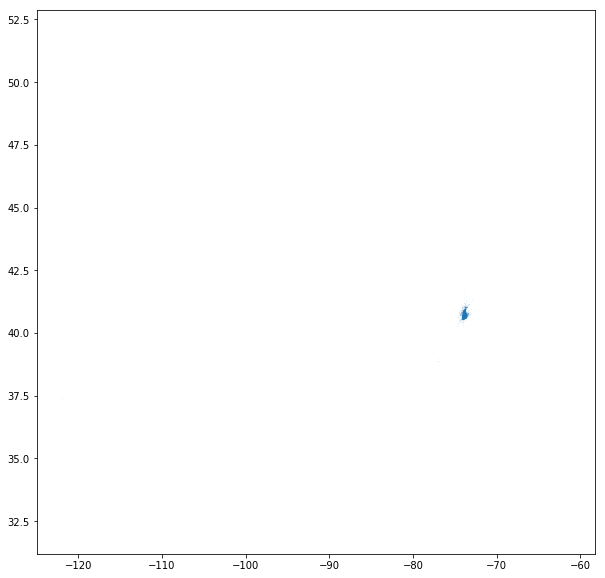

In [24]:
longitude = list(df.pickup_longitude) + list(df.dropoff_longitude)
latitude = list(df.pickup_latitude) + list(df.dropoff_latitude)
plt.figure(figsize = (10,10))
plt.plot(longitude,latitude,'.', alpha = 0.4, markersize = 0.05) #. is the birghtness or color. 
plt.show()
#alpha is color brightness. 
#. is the name of the graph
#markersize is the size of a point. different in 0.5 size of color. 

In [25]:
xlim = [-74.03, -73.77] #xlim is 0 is 74.03 
ylim = [40.63, 40.85]
df = df[(df.pickup_longitude> xlim[0]) & (df.pickup_longitude < xlim[1])]
df = df[(df.dropoff_longitude> xlim[0]) & (df.dropoff_longitude < xlim[1])]
df = df[(df.pickup_latitude> ylim[0]) & (df.pickup_latitude < ylim[1])]
df = df[(df.dropoff_latitude> ylim[0]) & (df.dropoff_latitude < ylim[1])]

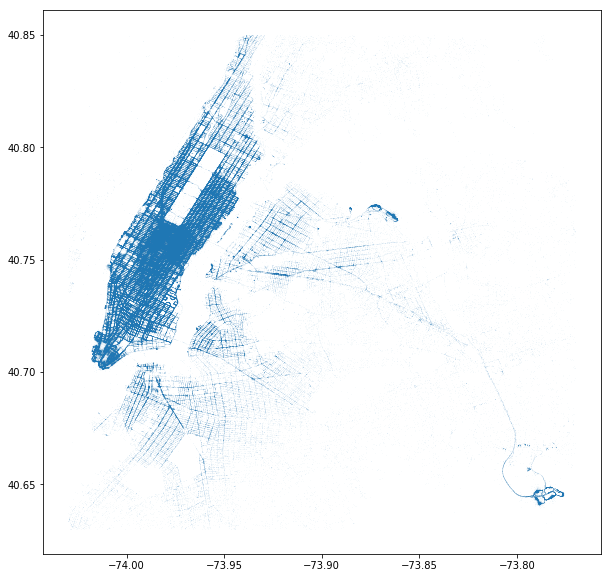

In [26]:
longitude = list(df.pickup_longitude) + list(df.dropoff_longitude)
latitude = list(df.pickup_latitude) + list(df.dropoff_latitude)
plt.figure(figsize = (10,10))
plt.plot(longitude,latitude,'.', alpha = 0.4, markersize = 0.05)
plt.show()

#https://www.latlong.net/place/new-york-city-ny-usa-1848.html


In [27]:
loc_df = pd.DataFrame() #df - fdataframe but 
loc_df['longitude'] = longitude
loc_df['latitude'] = latitude

In [28]:
loc_df.head()


longitude   latitude
0 -73.982155  40.767937
1 -73.980415  40.738564
2 -73.979027  40.763939
3 -74.010040  40.719971
4 -73.973053  40.793209

In [29]:
loc_df.shape #this many rows. 

(2877252, 2)

   longitude   latitude  label
0 -73.982155  40.767937     12
1 -73.980415  40.738564      9
2 -73.979027  40.763939     12
3 -74.010040  40.719971      8
4 -73.973053  40.793209      2
[12  9  8  2  3  0  4  7 13 14  5 10  6 11  1]


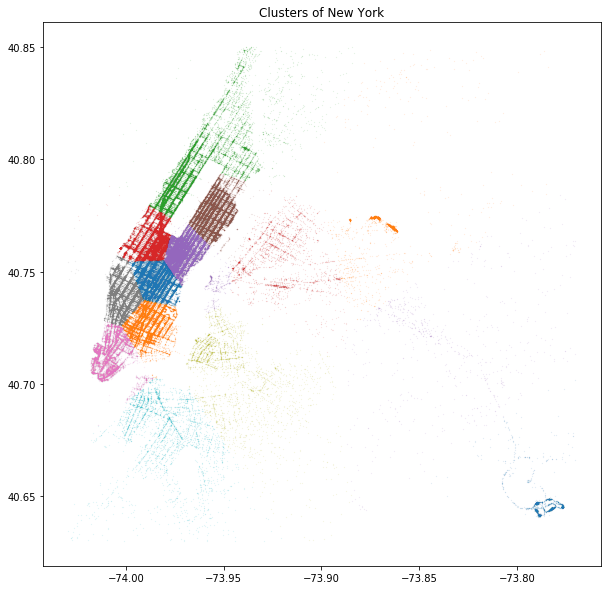

In [30]:
kmeans = KMeans(n_clusters=15, random_state=2, n_init = 10).fit(loc_df) #10 numbers and one is a cluster of 10.
loc_df['label'] = kmeans.labels_ #to cluster name. kmean is class and label is cluster name. part of sklearn is label


print(loc_df.head())
print(loc_df.label.unique()) #give you unique number of cluster which is 15. 
loc_df = loc_df.sample(200000) #2 million dataset. 
plt.figure(figsize = (10,10)) 
for label in loc_df.label.unique(): 
    plt.plot(loc_df.longitude[loc_df.label == label],loc_df.latitude[loc_df.label == label],'.', alpha = 0.3, markersize = 0.3)
#Now unique will give you no of cluster along with their label
#so here we are extracting data points foe each cluster

#so our loop starts 0 to 14
#so my label is 0 
#then i will match 0 in our dataset...all the points that have 0 as their label..i will plot it in same color
#then i will have 1 as label then i will get all datapoints that have 1 as their label we will plot all with 
#label 1 as different color. assigns the color there. 


plt.title('Clusters of New York')
plt.show()
#random_state is how many times we want to shuffle. 


In [31]:
#https://heartbeat.fritz.ai/k-means-clustering-using-sklearn-and-python-4a054d67b187
#n is rows and d is columsn. k is clusters. number of segments. 

#15 clusters and have 8. 8 is the constant. 

As we can see, the clustering results in a partition which is somewhat similar
to the way NY is divided into different neighborhoods. 
We can see Upper East
and West side of Central park in gray and pink respectively. West midtown in blue, 
Chelsea and West Village in brown, downtown area in blue, East Village and SoHo in purple.

The airports JFK and La LaGuardia have there own cluster,
and so do Queens and Harlem. Brooklyn is divided into 2 clusters, 
and the Bronx has too few rides to be separated from Harlem.

SyntaxError: invalid syntax (<ipython-input-31-5a587281e6a3>, line 6)

In [ ]:
 K means algorithm is an iterative algorithm that tries to parition
    the dataset into K predefined distinct non overlapping subgroups # non overlap means 
    #two data should not overlap.
    (clusters) where each data pointbelongs to only one group. It tries to make 
    inter cluster data points as similar as possible while also keeping the cluster
    as different (far) as possible.IT assigns data pointo cluster such that sum of square
    of distance beteen datapoint that belong to cluster and centroid of that luster is at the minimum.
    The less variation we have within a clusters the more homegenous (similar) data points are within
    same cluster.
    
    # first we randomly select k data points  in our case say 4 12 13 11 10
    #calculate the average which 10 that will be our centroid
    #now we will find the distance of each point from this centroid ...we find out 4 is the nearest one.
#then we make 4 and 10 as new cluster and 10+4/2 that is 7 is going to be my new centroid.. we keep doing 
#this to get more cluster.
    
    
    Specify the number of cluster k
    initialize centroid by first shuffling the dataset then randomly selecting Kdata points
    for the centroid without replacement
    keep iterating unitl there is no change to the centroid i.e. assignment of data points to 
    cluster is not changing.
    compute the sum of square of distance between data points and all centroid
    assign each data point to the closest (centroid)
    compute the centroids for the cluster by taking the average of all data points that belongs
    to each cluster
    
    
    Application of k mean algorithm: market segmentation, customer segmentation, image segmentation
        image compression. 

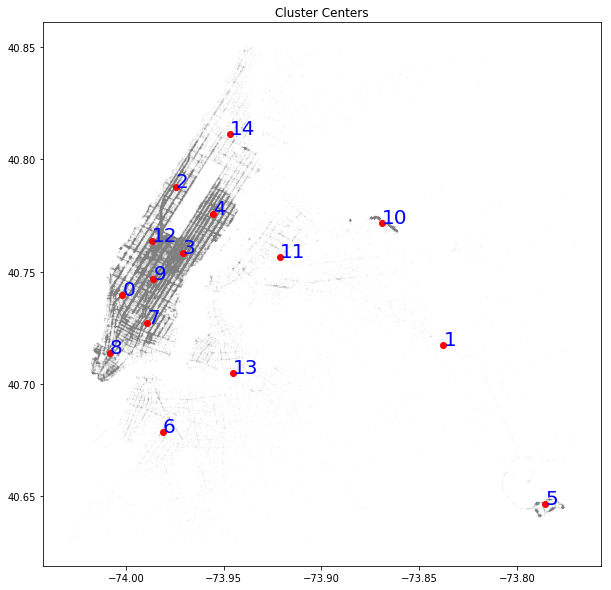

In [32]:
fig,ax = plt.subplots(figsize = (10,10))
for label in loc_df.label.unique():
    ax.plot(loc_df.longitude[loc_df.label == label],loc_df.latitude[loc_df.label == label],'.', alpha = 0.4, markersize = 0.1, color = 'gray')
    ax.plot(kmeans.cluster_centers_[label,0],kmeans.cluster_centers_[label,1],'o', color = 'r') #o is dot, going to be red color. 
    ax.annotate(label, (kmeans.cluster_centers_[label,0],kmeans.cluster_centers_[label,1]), color = 'b', fontsize = 20)
ax.set_title('Cluster Centers')
plt.show()
#label 0 is a list of all the centroid. Centroid is the average of the clusters. label 1 is. 0 and 1 is x and y. blue is 
#called anotation. 

In [33]:
df['pickup_cluster'] = kmeans.predict(df[['pickup_longitude','pickup_latitude']])
df['dropoff_cluster'] = kmeans.predict(df[['dropoff_longitude','dropoff_latitude']])
df['pickup_hour'] = df.pickup_datetime.apply(lambda x: parser.parse(x).hour )

In [34]:
df.head()

id  vendor_id      pickup_datetime     dropoff_datetime  \
0  id2875421          2  2016-03-14 17:24:55  2016-03-14 17:32:30   
1  id2377394          1  2016-06-12 00:43:35  2016-06-12 00:54:38   
2  id3858529          2  2016-01-19 11:35:24  2016-01-19 12:10:48   
3  id3504673          2  2016-04-06 19:32:31  2016-04-06 19:39:40   
4  id2181028          2  2016-03-26 13:30:55  2016-03-26 13:38:10   

   passenger_count  pickup_longitude  pickup_latitude  dropoff_longitude  \
0                1        -73.982155        40.767937         -73.964630   
1                1        -73.980415        40.738564         -73.999481   
2                1        -73.979027        40.763939         -74.005333   
3                1        -74.010040        40.719971         -74.012268   
4                1        -73.973053        40.793209         -73.972923   

   dropoff_latitude store_and_fwd_flag  trip_duration  pickup_cluster  \
0         40.765602                  N            455              12   
1         40.731152                  N            663               9   
2         40.710087                  N           2124              12   
3         40.706718                  N            429               8   
4         40.782520                  N            435               2   

   dropoff_cluster  pickup_hour  
0                3           17  
1                0            0  
2                8           11  
3                8           19  
4                2           13

In [35]:
clusters = pd.DataFrame()
clusters['x'] = kmeans.cluster_centers_[:,0]
clusters['y'] = kmeans.cluster_centers_[:,1]
clusters['label'] = range(len(clusters))

In [36]:
loc_df = loc_df.sample(5000)

In [ ]:
#And the following animation, every arrow represents rides from one cluster to another. 
#The width of the arrow is proportional to the relative amount of trips in the relevant hour.

MovieWriter imagemagick unavailable. Trying to use pillow instead.
/Users/user/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)



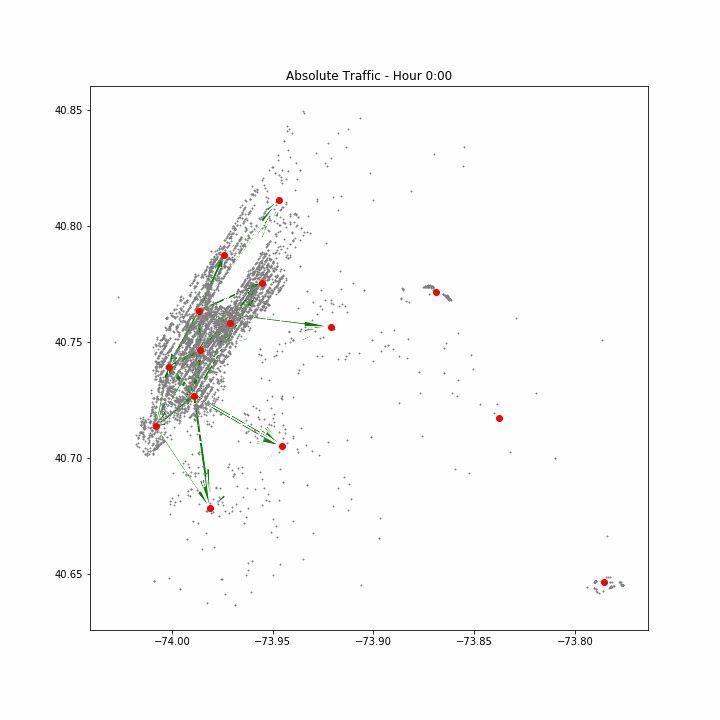

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

In [37]:
fig, ax = plt.subplots(1, 1, figsize = (10,10)) #figure number 

def animate(hour):
    ax.clear() #ax. make the graph clear. 
    ax.set_title('Absolute Traffic - Hour ' + str(int(hour)) + ':00') #print 00 up to 23. 
    plt.figure(figsize = (10,10));
    for label in loc_df.label.unique():
        ax.plot(loc_df.longitude[loc_df.label == label],loc_df.latitude[loc_df.label == label],'.', alpha = 1, markersize = 2, color = 'gray');
        ax.plot(kmeans.cluster_centers_[label,0],kmeans.cluster_centers_[label,1],'o', color = 'r');


    for label in clusters.label:
        for dest_label in clusters.label:
            num_of_rides = len(df[(df.pickup_cluster == label) & (df.dropoff_cluster == dest_label) & (df.pickup_hour == hour)])
            dist_x = clusters.x[clusters.label == label].values[0] - clusters.x[clusters.label == dest_label].values[0]
            dist_y = clusters.y[clusters.label == label].values[0] - clusters.y[clusters.label == dest_label].values[0]
            pct = np.true_divide(num_of_rides,len(df))
            arr = Arrow(clusters.x[clusters.label == label].values, clusters.y[clusters.label == label].values, -dist_x, -dist_y, edgecolor='white', width = 15*pct)
            ax.add_patch(arr)
            arr.set_facecolor('g')


ani = animation.FuncAnimation(fig,animate,sorted(df.pickup_hour.unique()), interval = 1000)
plt.close()
ani.save('animation.gif', writer='imagemagick', fps=2)
filename = 'animation.gif'
video = io.open(filename, 'r+b').read()
encoded = base64.b64encode(video)
HTML(data='''<img src="data:image/gif;base64,{0}" type="gif" />'''.format(encoded.decode('ascii')))

MovieWriter imagemagick unavailable. Trying to use pillow instead.
/Users/user/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)



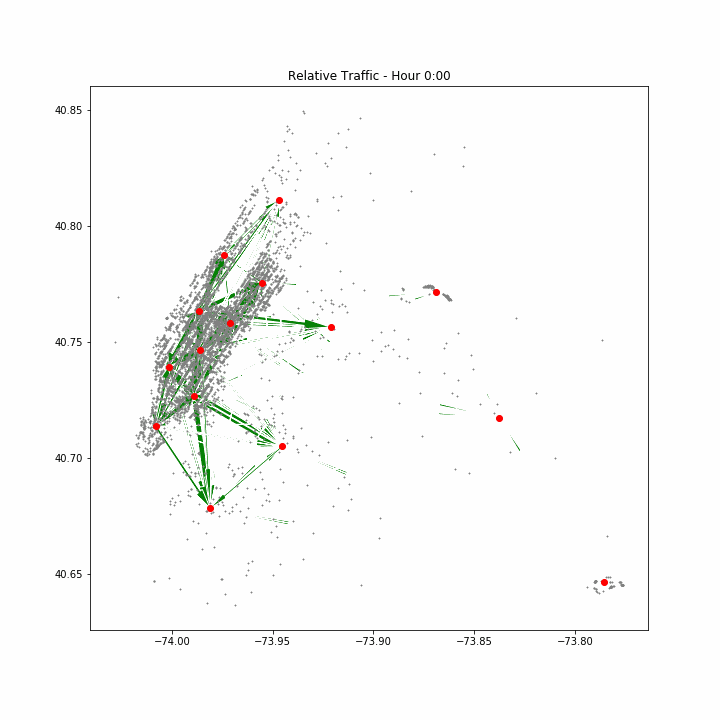

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

In [38]:
fig, ax = plt.subplots(1, 1, figsize = (10,10))

def animate(hour):
    ax.clear()
    ax.set_title('Relative Traffic - Hour ' + str(int(hour)) + ':00')    
    plt.figure(figsize = (10,10))
    for label in loc_df.label.unique():
        ax.plot(loc_df.longitude[loc_df.label == label],loc_df.latitude[loc_df.label == label],'.', alpha = 1, markersize = 2, color = 'gray')
        ax.plot(kmeans.cluster_centers_[label,0],kmeans.cluster_centers_[label,1],'o', color = 'r')


    for label in clusters.label:
        for dest_label in clusters.label:
            num_of_rides = len(df[(df.pickup_cluster == label) & (df.dropoff_cluster == dest_label) & (df.pickup_hour == hour)])
            dist_x = clusters.x[clusters.label == label].values[0] - clusters.x[clusters.label == dest_label].values[0]
            dist_y = clusters.y[clusters.label == label].values[0] - clusters.y[clusters.label == dest_label].values[0]
            pct = np.true_divide(num_of_rides,len(df[df.pickup_hour == hour]))
            arr = Arrow(clusters.x[clusters.label == label].values, clusters.y[clusters.label == label].values, -dist_x, -dist_y, edgecolor='white', width = pct)
            ax.add_patch(arr)
            arr.set_facecolor('g')


ani = animation.FuncAnimation(fig,animate,sorted(df.pickup_hour.unique()), interval = 1000)
plt.close()
ani.save('animation.gif', writer='imagemagick', fps=2) #image magic. function that writes into the file. 
filename = 'animation.gif'
video = io.open(filename, 'r+b').read() #read and binary 
encoded = base64.b64encode(video) #we get this encode online 
HTML(data='''<img src="data:image/gif;base64,{0}" type="gif" />'''.format(encoded.decode('ascii')))
#ascii amount of standard code for coding. 

In [7]:
The share of taxis travelling to Brooklyn area, mostly Williamsburg,
becomes much larger in the late evening. Since there's no similar movement in the
morning hours (in the opposite direction), this is unlikely to be the result of commuting. 
Instead, and since the traffic is mostly seen after 22:00, these are probably people going out.

Since the arrows represent the relative traffic in the relevant hour, it is also possible that 
the increasing width of the arrows leading to Brooklyn may simply be a result of the reduction 
in the rides in Manhattan, due to the commercial character of big parts of it. But when looking 
at the absolute traffic, the arrows from Manhattan to Brooklyn are barely seen for the most part of the day.

In the very early morning, most of the traffic is to and from the two airports. As we can 
learn from the absolute graph, this is merely the result of decrease in traffic in the other parts of town.

SyntaxError: invalid syntax (<ipython-input-7-1cf325fae5ec>, line 1)

In [39]:
neighborhood = {-74.0019368351: 'Chelsea',-73.837549761: 'Queens',-73.7854240738: 'JFK',-73.9810421975:'Midtown-North-West',-73.9862336241: 'East Village',
                -73.971273324:'Midtown-North-East',-73.9866739677: 'Brooklyn-parkslope',-73.8690098118: 'LaGuardia',-73.9890572967:'Midtown',-74.0081765545: 'Downtown'
                ,-73.9213024854: 'Queens-Astoria',-73.9470256923: 'Harlem',-73.9555565018: 'Uppe East Side',
               -73.9453487097: 'Brooklyn-Williamsburgt',-73.9745967889:'Upper West Side'}

In [40]:
rides_df = pd.DataFrame(columns = neighborhood.values())
rides_df['name'] = neighborhood.values()

neigh = KNeighborsClassifier(n_neighbors=1) #starting from 1 neighbor.
neigh.fit(np.array(list(neighborhood.keys())).reshape(-1, 1), list(neighborhood.values()))
#column to row. in reshape.
# numbers in the dictionary neighborhood and values are the words in the beighborhood in the dictionary
#fit does? 
#key does are the numbers that will give from where neighborhood is located..the longitude

#value? words in dictionary
#fit is the function in machine learning algorithm that looks for correct values here finding out the correct 
#neighborhood.

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [46]:
df['pickup_neighborhood'] = neigh.predict(df.pickup_longitude.to_numpy().reshape(-1,1))
df['dropoff_neighborhood'] = neigh.predict(df.dropoff_longitude.to_numpy().reshape(-1,1))

for col in rides_df.columns[:-1]:
    rides_df[col] = rides_df.name.apply(lambda x: len(df[(df.pickup_neighborhood == x) & (df.dropoff_neighborhood == col)]))
    #

In [47]:
import plotly.offline as py
import plotly.graph_objs as go
py.init_notebook_mode(connected=True)

trace = go.Heatmap(z= np.array(rides_df.as_matrix()),
                  x = rides_df.columns[:-1],
                  y = rides_df.columns)
layout = dict(
    title = ' <b>Neighborhoods Interaction</b>',
    titlefont = dict(
    size = 30,
    color = ('rgb(100,100,100)')),
    margin = dict(t=100,r=100,b=100,l=150),
        yaxis = dict(
            title = ' <b> From </b>'),
        xaxis = dict(
            title = '<b> To </b>'))
data=[trace]
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='labelled-heatmap')

/Users/user/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning:

Method .as_matrix will be removed in a future version. Use .values instead.



In [ ]:
rides_df.index = rides_df.name
rides_df = rides_df.drop('name', axis = 1)

<equation>  <sup>n</sup>C <sub>x</sub> X P<sup>x</sup>X(1-P)<sup>n-x</sup></equation>

In [ ]:
n means no of trials
x means no of success
p is the prabablity of success
C means combinations

In [ ]:
Why we use normal distribution? such a complex formula
1. Many things actually normally distributed or very close to it..For example height ans intelligence are 
are approximately normally distributed, measurement errors also often have a normal distribution.
The normal distribution is easy to work with mathematicallly. In many practical cases,
the methods developed usinf normal theory work quite well even when distribution is not normal

There is very strong connection between the size of sample N and the extent to which sample
distributon approaches the normal form.Many sampling distribution based on laege N approximated by normal distribution
even though population distribution itself is definetly not normal.



In [ ]:
Family income is N($25000,$1000000) if the poverty level is $10000 what percentage of population
lives in poverty.



In [19]:
from collections import Counter
import math

def knn(data, query, k, distance_fn, choice_fn): #74 line k is 3. distance is ecu choice = mean 
    #query is 60 which is the height for which we want the prediction. data is height and weight of all the person
    neighbor_distances_and_indices = []
    
    # 3. For each example in the data
    for positon, person in enumerate(data):
        # 3.1 Calculate the distance between the query example and the current
        # example from the data. person has weight and height. in the form of list.  person[:-1] ---height
        #position is a index. 
        distance = distance_fn(person[:-1], query) #(height,60) #line 40 
        #point 1 65 - 60 will be 5 and then square. from line 46. from 13 to 46. then 18. will give you the height
        #for person -1 . persons height. 
        print('distances',distance)
        
        # 3.2 Add the distance and the index of the example to an ordered collection
        neighbor_distances_and_indices.append((distance, positon)) 
        print(neighbor_distances_and_indices) #we are adding our distance and position. index position of a 
        #person. 
    
    # 4. Sort the ordered collection of distances and indices from
    # smallest to largest (in ascending order) by the distances
    sorted_neighbor_distances_and_indices = sorted(neighbor_distances_and_indices)
    print(sorted_neighbor_distances_and_indices)
    # 5. Pick the first K entries from the sorted collection
    k_nearest_distances_and_indices = sorted_neighbor_distances_and_indices[:k] #number of neighbors you want. is k 
    print(k_nearest_distances_and_indices)
    # 6. Get the labels of the selected K entries
    k_nearest_labels = [data[i][1] for distance, i in k_nearest_distances_and_indices] # picking top 3 which is k
    #distance and indices. data 3 for distance. and then position 
    print(k_nearest_labels)
    # 7. If regression (choice_fn = mean), return the average of the K labels
    # 8. If classification (choice_fn = mode), return the mode of the K labels
    return k_nearest_distances_and_indices , choice_fn(k_nearest_labels) #position and distance at indices. 
#choice fn is your mean. which function you want to perform. 

def mean(labels):
    return sum(labels) / len(labels)

def mode(labels):
    return Counter(labels).most_common(1)[0][0] # this is goint to find out frequency of 
# each value using counters and then give you most frequent value referred as most common. fir
# first tuple that is the set ..
#returns a list of n most common elements and their counts from the most common to the least..
#here 1 means find out one most common element from list and its valeue
#[][0][0]---height the two heights. 


def euclidean_distance(point1, point2):
    sum_squared_distance = 0
    print('Calculating distance between ',point1, point2)
    for i in range(len(point1)):
        print(point1[i],point2[i])
        sum_squared_distance += math.pow(point1[i] - point2[i], 2)
    z= math.sqrt(sum_squared_distance) 
    print('=',z) #prints your value 
    return z

def main():
    '''
    # Regression Data
    # 
    # Column 0: height (inches)
    # Column 1: weight (pounds)
   reg_data = [
       [65.75, 112.99],
       [71.52, 136.49],
       [69.40, 153.03],
       [68.22, 142.34],
       [67.79, 144.30],
       [68.70, 123.30],
       [69.80, 141.49],
       [70.01, 136.46],
       [67.90, 112.37],
       [66.49, 127.45],
    ]
    
    
    
    # Question:
    # Given the data we have, what's the best-guess at someone's weight if they are 60 inches tall?
    reg_query = [60]
    reg_k_nearest_neighbors, reg_prediction = knn(
        reg_data, reg_query, k=3, distance_fn=euclidean_distance, choice_fn=mean
    )
    
    print(reg_prediction)
    '''
    # Classification Data
    # 
    # Column 0: age
    # Column 1: likes pineapple
    
    clf_data = [
       [22, 1],
       [23, 1],
       [21, 1],
       [18, 1],
       [19, 1],
       [25, 0],
       [27, 0],
       [29, 0],
       [31, 0],
       [45, 0],
    ]
    # Question:
    # Given the data we have, does a 33 year old like pineapples on their pizza?
    clf_query = [33]
    clf_k_nearest_neighbors, clf_prediction = knn(
        clf_data, clf_query, k=3, distance_fn=euclidean_distance, choice_fn=mode #nearest neighbors. 
    )
    print(clf_prediction)
    if clf_prediction == 0:
        print('person with age ',clf_query[0], 'does not like pineapple')
    else:
        print('person wit age ',clf_query[0],'likes the pineapple')
    

if __name__ == '__main__':
    main()

Calculating distance between  [22] [33]
22 33
= 11.0
distances 11.0
[(11.0, 0)]
Calculating distance between  [23] [33]
23 33
= 10.0
distances 10.0
[(11.0, 0), (10.0, 1)]
Calculating distance between  [21] [33]
21 33
= 12.0
distances 12.0
[(11.0, 0), (10.0, 1), (12.0, 2)]
Calculating distance between  [18] [33]
18 33
= 15.0
distances 15.0
[(11.0, 0), (10.0, 1), (12.0, 2), (15.0, 3)]
Calculating distance between  [19] [33]
19 33
= 14.0
distances 14.0
[(11.0, 0), (10.0, 1), (12.0, 2), (15.0, 3), (14.0, 4)]
Calculating distance between  [25] [33]
25 33
= 8.0
distances 8.0
[(11.0, 0), (10.0, 1), (12.0, 2), (15.0, 3), (14.0, 4), (8.0, 5)]
Calculating distance between  [27] [33]
27 33
= 6.0
distances 6.0
[(11.0, 0), (10.0, 1), (12.0, 2), (15.0, 3), (14.0, 4), (8.0, 5), (6.0, 6)]
Calculating distance between  [29] [33]
29 33
= 4.0
distances 4.0
[(11.0, 0), (10.0, 1), (12.0, 2), (15.0, 3), (14.0, 4), (8.0, 5), (6.0, 6), (4.0, 7)]
Calculating distance between  [31] [33]
31 33
= 2.0
distances 2.

[[5.1 3.5]
 [4.9 3. ]
 [4.7 3.2]
 [4.6 3.1]
 [5.  3.6]
 [5.4 3.9]
 [4.6 3.4]
 [5.  3.4]
 [4.4 2.9]
 [4.9 3.1]
 [5.4 3.7]
 [4.8 3.4]
 [4.8 3. ]
 [4.3 3. ]
 [5.8 4. ]
 [5.7 4.4]
 [5.4 3.9]
 [5.1 3.5]
 [5.7 3.8]
 [5.1 3.8]
 [5.4 3.4]
 [5.1 3.7]
 [4.6 3.6]
 [5.1 3.3]
 [4.8 3.4]
 [5.  3. ]
 [5.  3.4]
 [5.2 3.5]
 [5.2 3.4]
 [4.7 3.2]
 [4.8 3.1]
 [5.4 3.4]
 [5.2 4.1]
 [5.5 4.2]
 [4.9 3.1]
 [5.  3.2]
 [5.5 3.5]
 [4.9 3.6]
 [4.4 3. ]
 [5.1 3.4]
 [5.  3.5]
 [4.5 2.3]
 [4.4 3.2]
 [5.  3.5]
 [5.1 3.8]
 [4.8 3. ]
 [5.1 3.8]
 [4.6 3.2]
 [5.3 3.7]
 [5.  3.3]
 [7.  3.2]
 [6.4 3.2]
 [6.9 3.1]
 [5.5 2.3]
 [6.5 2.8]
 [5.7 2.8]
 [6.3 3.3]
 [4.9 2.4]
 [6.6 2.9]
 [5.2 2.7]
 [5.  2. ]
 [5.9 3. ]
 [6.  2.2]
 [6.1 2.9]
 [5.6 2.9]
 [6.7 3.1]
 [5.6 3. ]
 [5.8 2.7]
 [6.2 2.2]
 [5.6 2.5]
 [5.9 3.2]
 [6.1 2.8]
 [6.3 2.5]
 [6.1 2.8]
 [6.4 2.9]
 [6.6 3. ]
 [6.8 2.8]
 [6.7 3. ]
 [6.  2.9]
 [5.7 2.6]
 [5.5 2.4]
 [5.5 2.4]
 [5.8 2.7]
 [6.  2.7]
 [5.4 3. ]
 [6.  3.4]
 [6.7 3.1]
 [6.3 2.3]
 [5.6 3. ]
 [5.5 2.5]
 [5.5 2.6]

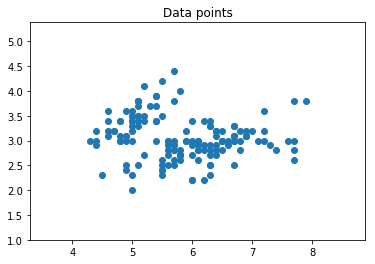

In [3]:
import matplotlib
import numpy as np
from sklearn import neighbors, datasets
import matplotlib.pyplot as plt
# import some data to play with
iris = datasets.load_iris()

iris # this is iris dataset available in sklearn...this data contains
#sepal length and width and petal length and width....
# take the first two features
# we want to extract only sepal length and sepal width
X = iris.data[:, :2] #all rows and 2 columns.
# this is the existing classes that it has
y = iris.target
#2 is ohter class
# target here is class of a flower ..0 1 and 2..each row of above mentioned data that is X
#belongs to any of these classes
print(X)
print(y)
h=0.02
# getting the minimum and maximum of length of speal and width of sepals
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

#now here randomize the variables... i.e. length and with...shuffle
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))


plt.figure()
plt.scatter(X[:, 0], X[:, 1])
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("Data points")
plt.show()


In [24]:

clf = neighbors.KNeighborsClassifier(n_neighbors=6, weights='distance')
# this wil create a KNN model with 3 classes  
clf.fit(X, y) # here we arer training our model with available data i.e. length and width of sepal 
#stored in X and classes y


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=6, p=2,
                     weights='distance')

In [25]:
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
# ravel is numpy method....that will onvery 2 dimensional array and 1 dimension array where
# mean contigious order in memory..for faster prediction.... 
print(Z)

[1 1 1 ... 2 2 2]


(220, 280)
<built-in method reshape of numpy.ndarray object at 0x1a1bdf7e40>


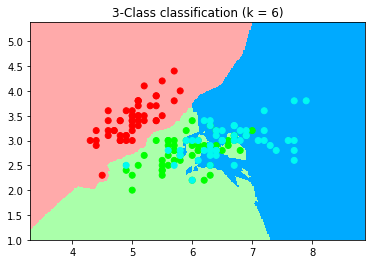

In [26]:
from matplotlib.colors import ListedColormap
Z = Z.reshape(xx.shape) #shape define no of rows and values ... reshape will interchange values
print(xx.shape)
print(xx.reshape) # it will it single  dimension .. in the reshape you to pass new dimension
plt.figure()
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA','#00AAFF']) #Color Map for background
cmap_bold = ListedColormap(['#FF0000', '#00FF00','#00FAF1'])# colormap for training data
plt.pcolormesh(xx, yy, Z, cmap=cmap_light) # to draw the boundaries
# Plot also the training points
# pcolormesh() use the number of values in the 
#colormap to map the data from the numerical values of the scalar in argument z. 
#To use a different number of colors, change the colormap with the cmap named argument.
#The number of colors in the colormap will determine the color resolution of the resulting images.
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)
#this will plot dots in a map with the color depending upon the corresponding target value of y..
#x 0 and x1 is length and width. my length is my x of 6 and 4.5 is width and we will get a dot on the graph

# c is the sequence  of classes and their coresponding colors with our training data the dark colors is
# our training data..
plt.xlim(xx.min(), xx.max()) #  x lim and y lim are the functions that determins the limit of each axis
# based on the range of data...
plt.ylim(yy.min(), yy.max())
plt.title("3-Class classification (k = %i)" % (6)) #k=6
plt.show()

In [23]:
#unsuperised learning is like telling a machine this a monkey multiple times.
#superised is givig the machien training data like stocks of 3 months and asking it base on the 3 months, 
#what is our 4th month data. 
#Social Network Analysis....classisfy group of friends
#Market segmentation of companies...mid cap, small cap
#organizing computing clusters baesed on similar event patterns and process.;

In [28]:

# make prediction
sl = input('Enter sepal length (cm): ')
sw = input('Enter sepal width (cm): ')
dataClass = clf.predict([[sl,sw]])
print('Prediction: '),

if dataClass == 0:
    print('Iris Setosa')
elif dataClass == 1:
    print('Iris Versicolour')
else:
    print('Iris Virginica')

Enter sepal length (cm): 5.2
Enter sepal width (cm): 2.6
Prediction: 
Iris Versicolour


/Users/user/anaconda3/lib/python3.7/site-packages/sklearn/neighbors/_classification.py:171: FutureWarning: Beginning in version 0.22, arrays of bytes/strings will be converted to decimal numbers if dtype='numeric'. It is recommended that you convert the array to a float dtype before using it in scikit-learn, for example by using your_array = your_array.astype(np.float64).
  X = check_array(X, accept_sparse='csr')
/Users/user/anaconda3/lib/python3.7/site-packages/sklearn/neighbors/_base.py:605: FutureWarning: Beginning in version 0.22, arrays of bytes/strings will be converted to decimal numbers if dtype='numeric'. It is recommended that you convert the array to a float dtype before using it in scikit-learn, for example by using your_array = your_array.astype(np.float64).
  X = check_array(X, accept_sparse='csr')


In [ ]:
Seaborn:   Matpolotlib tries to make easy things and hard things possible, seaborn tries to make well defined
    set of hard things easy too.
    Seaborn helps resolve the two major problems faced by matplotlib
    Default matplotlin parameters
    working with dataaframes
Seaborn is built on the top of pythons core visualization library matplotlib, it is mean to serve 
as compliment and not a replacement. 
Built in themes for styling matplotlib graphics


In [ ]:
Types of Plot
BarBarth
Boxplot
Hist
hist2d
Pie
Plot
Scatter
Stackplot
Stem
Step
Quiver'

----------
imread: to read image from file
imsave: to save image in a file
imshow: display an image on the axes
--------------------------------
    Axis function
    axes: add axes to the figure
    text : add text to the axes
    title
    XLabel
    Xlim
    Xscale
    Xticks
    Ylabel
    Ylim
    Yscale
    Yticks
    .......
    Figtext:add text to figure
    Figure : create a new figure
    show
    savefig
    close
    -----------------------------------------------------
    
    

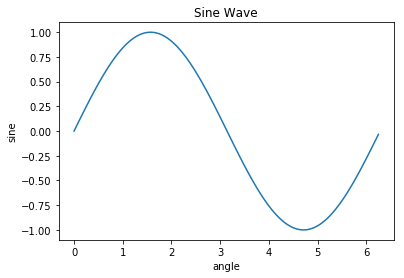

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import math
x = np.arange(0,math.pi*2,0.05)  # x is the angle in radian  ....0 to 314*2.....with step of 0.05
y=np.sin(x) # y is the sin  of x 
plt.plot(x,y)
plt.xlabel("angle")
plt.ylabel("sine")
plt.title("Sine Wave")
plt.show()

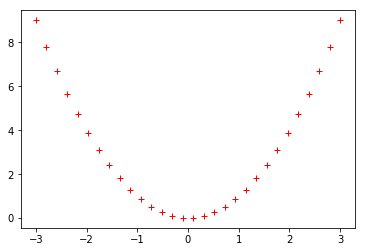

In [9]:
from pylab import *
from numpy import *
x = linspace(-3,3,30) #starting, ending and and number of bins. 
y=x**2 #square 
plot(x,y,'r+')#-,_,o,^,V<,>,s,+,x,D,d,1,2,3,4,h<H,p
show() # we can use colors b,g,r,c,m,y,k,w

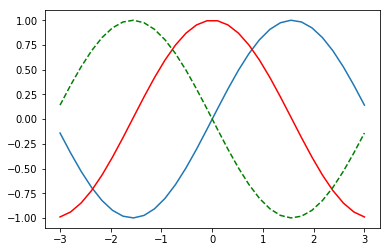

In [10]:
#plots can be overlaid
from pylab import *
plot(x,sin(x))
plot(x,cos(x),'r-') #r is color 
plot(x,-sin(x),'g--') #green 
show()

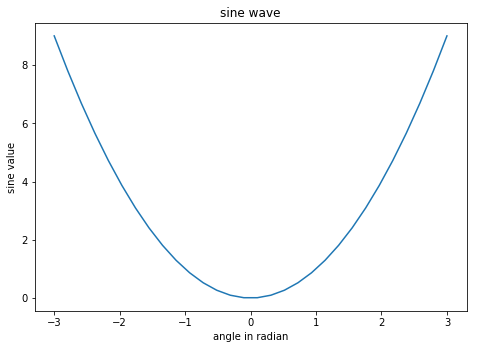

In [12]:
#here we keeps track of all figures  using figure,,,,we create figures and through those figure
#and axes object..
fig=plt.figure()
#now figure is created, we will added axes to it ...left,bottom,width and height of the figure
ax=fig.add_axes([0,0,1,1]) #0 is the left, bottom. width. height of figure. 
#set the label
ax.set_title("sine wave")
ax.set_xlabel("angle in radian")
ax.set_ylabel("sine value")
#invlode the plot
ax.plot(x,y)

In [ ]:
figsize # to specify width and height
Dpi ...dots per inch
Facecolor: figure patch facecolor
Edgecolor: figure path edge color
    linewidth:edge line width
        
        

In [ ]:
Axes objexct in this region of the image with the data space.A given figure can contain
may axes but a given axes ovject can only be in one figure..The axes contains two axis
The axes class and its member functions are the primary entry point to working with OO interface
Axes object iss added to figure by calling the add_axes() method. it returns the axes object and adds an
axes at position rect{left, bottom,width, height}...

Legend(0 method of axes class adda legend to the plot figure)
ax.legend(handles, labels,loc)
where labels is a sequence of strings and handles a sequence of Line2D or patch instance
loc can be string or an integer specifying the legend location

 

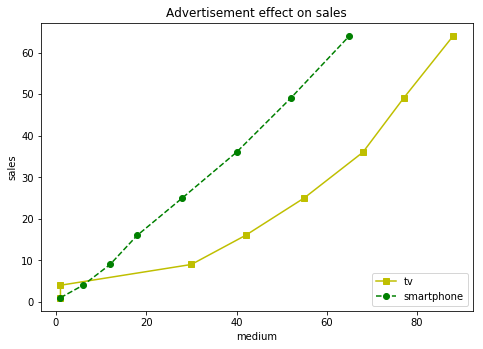

In [15]:
import matplotlib.pyplot as plt
y=[1,4,9,16,25,36,49,64] # here have values i.e. dataset we are not using linspace for getting values
x1=[1,1,30,42,55,68,77,88]
x2=[1,6,12,18,28,40,52,65]
fig=plt.figure()
ax=fig.add_axes([0,0,1,1]) #is the left, bottom. width. height of figure
l1=ax.plot(x1,y,'ys-')#solid line with yellow color and square markers
l2=ax.plot(x2,y,'go--')# dash line with green color and circle marker
ax.legend(labels=('tv','smartphone'),loc='lower right') #legend placed at lower right
ax.set_title("Advertisement effect on sales")
ax.set_xlabel("medium")
ax.set_ylabel("sales")
plt.show()

In [ ]:
#How to create multiple subplots on same canvas.

#The subplot function returns the axzes object at a given grid position
#plt.subplot(subplot(nrows,ncols,index))
#in the current figure, the function creates and returns an axes object at positon index
#of a grid of nrows by ncolaxes, Indexes go from 1 to nrows*ncolos...incrementing in row major order...if 
#nrows, ncols index are all less than 10...the index can also be given as single, concatenated three digit no.


#For example subplot(2,3,3) and subplot(233) both createan axes at the top right corner of current figure occupying 
#half of the figure height and a third of the figure width.

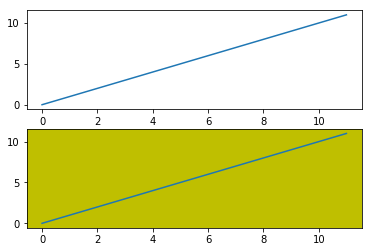

In [17]:
import matplotlib.pyplot as plt
#plot a line, implicitly creating a subplot(111)
plt.plot([1,2,3]) # create a plot with 1 columns and 2 rows  with index 3
# now create a subplot which represents te top plot of a grid with 2 rows and 1 column
#since this subplot will overlap thefirst, the plot( and its axes) previously created
#will be removed
plt.subplot(211)
#2 is half of the height and 1 is full width. 1 after that is index position 
#f    it will be created at the top right corner....
#occupying half of the figure height and full width
#first parameter represent fraction of height and second represents fraction of width
plt.plot(range(12))
plt.subplot(212,facecolor='y')#creates 2nd subplot with yellow background, 2nd row 
plt.plot(range(12))


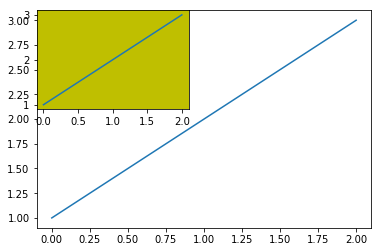

In [18]:
import matplotlib.pyplot as plt
fig=plt.figure()
ax1=fig.add_subplot(111)
ax1.plot([1,2,3])  # y axis 1,2,3 
ax2=fig.add_subplot(221,facecolor='y')
ax2.plot([1,2,3])

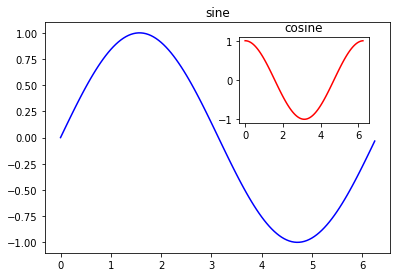

In [19]:
import matplotlib.pyplot as plt
import numpy as np
import math
x=np.arange(0,math.pi*2,0.05) #arrange will create data from 0 to 2pi. this will create data from 0 to 28*3.14
#with 0.05 diffence between each point on x axis
fig=plt.figure()
axes1=fig.add_axes([0.1,0.1,0.8,0.8]) #min axes.. this will create the a subplot axes at x=0.1 and y=0.1
# and height will be 80 percent of canvas and width will be 80 percent of canvas
axes2=fig.add_axes([0.55,0.55,0.3,0.3]) # insert axes # sub plot will be drawn with axis starting from 0.55
# in x and y with 30 percent height and 30 percent width.
y=np.sin(x)
axes1.plot(x,y,'b')
axes2.plot(x,np.cos(x),'r')
axes1.set_title('sine')
axes2.set_title('cosine')
plt.show()

In [ ]:
 pyplot API has a convenience function  called subplot which acts as a utility wrapper and helps in
    creation common layouts of subplots including the enclosing figure objects in a single call.
    
plt.subplots(nrows,ncolos)
The two integer arguments to this function specifiyif the number of rows 
and columns of the subplot grid. The function returns object and a tuple containing axes
objects equal to nrows and ncols..Each axes object is accessible by its index..Here we create a subplot of 2 rows
and 2 columns and display 4 differnet plots in each subplot

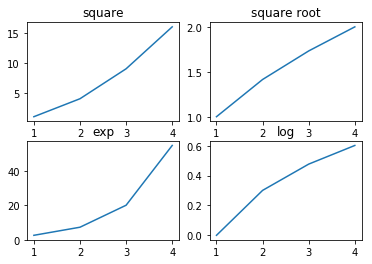

In [22]:
import matplotlib.pyplot as plt
fig,a=plt.subplots(2,2)
import numpy as np
x=np.arange(1,5)
a[0][0].plot(x,x*x) #1 * 1. 2*2 = 4.
a[0][0].set_title('square')
a[0][1].plot(x,np.sqrt(x))
a[0][1].set_title('square root')
a[1][0].plot(x,np.exp(x)) #10 to the power of 1,2,3.
a[1][0].set_title('exp')
a[1][1].plot(x,np.log10(x))
a[1][1].set_title('log')
plt.show()

In [ ]:
https://byjus.com/maths/value-of-log-1-to-10/
    

In [ ]:
plt.subplot2grid(shape,location,rowspan,colspan)
This function gives more flexiblity in creating an axes object
here you go.

In [ ]:
Sometimes one or few points are much larger than bulk of data.In such case the scale of an axis
needs to be set as lograthmic rather than normal scale, This is the lograthmic scale.
In matplotlibit is possible by setting xscale or vscale property of ais object to log.

It is also required to sometimes to show asome additional distance betweeen axis numbers and axis label.


In [ ]:
It is also required sometimes to show some additional distance between the axis .Both the above features are
demonstrated with the help of the following..The subnplot on the right has a lograthmic  and one on left
has its  x axis having label at more distance.

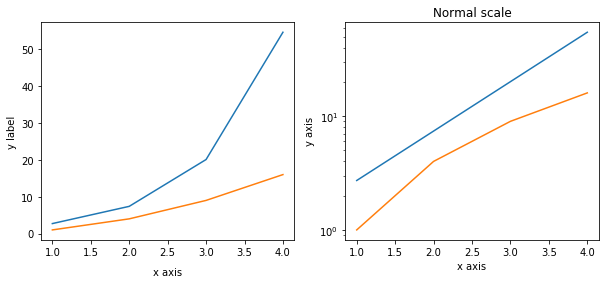

In [3]:
import matplotlib.pyplot as plt
import numpy as np
fig, axes  = plt.subplots(1,2,figsize=(10,4)) # 1 represents the number of rows and 2 represents the no of columns
#12 is represents subset where 1 is the number of rows. and 2 is columns. 
#10 and 4 is the complete figure. 
x=np.arange(1,5)# no of range from 1,2,3,4
axes[0].plot(x,np.exp(x)) # this will plot the exponential graph
axes[0].plot(x,x**2) # this is going to be parabolic graph, exp. 
axes[1].set_title("Normal scale")#add title to it
axes[1].plot(x,np.exp(x))#add expotnetial, this means squaring it. 
axes[1].plot(x,x**2)
axes[1].set_yscale("log") # you will get log function of each value of x..it will scale that 
#means you will get to see allvalues of x/
axes[0].set_xlabel("x axis")
axes[0].set_ylabel("y label")
axes[0].xaxis.labelpad=10 #base of a log function. 
axes[1].set_xlabel("x axis")
axes[1].set_ylabel("y axis")
plt.show()
 
#line 10 first line of second graph and line 11 for second line of second graph
#line 7 and 8 points to the first graph. 


In [ ]:
Axis spines are the lines connecting axis tick marks demarcating boundaries of plot area.
The axes object has spine 
located has spine located at the top, bottom, left and right.
Each spine can be formatted by specifying color and width..any edge    can be made invisible if its
color is set to none.

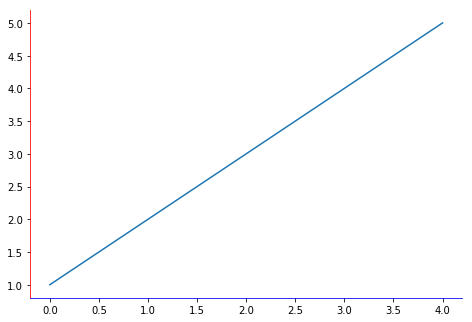

In [5]:
import matplotlib.pyplot as plt
fig =plt.figure()
ax=fig.add_axes([0,0,1,1]) # add _axes is the function that will add axis at the x cordinate which is 0 and
#y location which is . 1,1 is height and width. 
ax.spines['bottom'].set_color('blue')
ax.spines['left'].set_color('red')
ax.spines['right'].set_color(None)
ax.spines['top'].set_color(None)
ax.plot([1,2,3,4,5]) # it is the y axis that will be drawn over x axis.. thats why it goes up.
plt.show()

In [ ]:
Matplotlib automatically arrives at the minimum and maximum values of variable to be displayed 
along x and y and z axis...However it is possible to set the limit exploicitly by using set_xlim and set_ylim


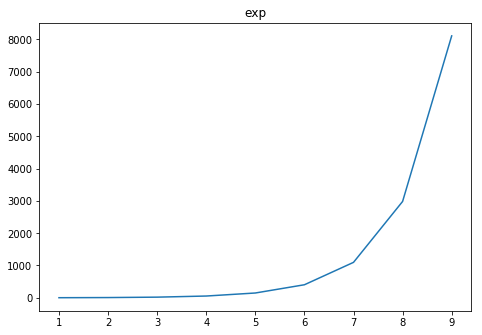

In [7]:
import matplotlib.pyplot as plt
fig=plt.figure()
a1=fig.add_axes([0,0,1,1]) #x and y is 0 and 1 and 1 is height and weight. 
import numpy as np
x = np.arange(1,10) 
a1.plot(x,np.exp(x))
a1.set_title('exp')
plt.show()

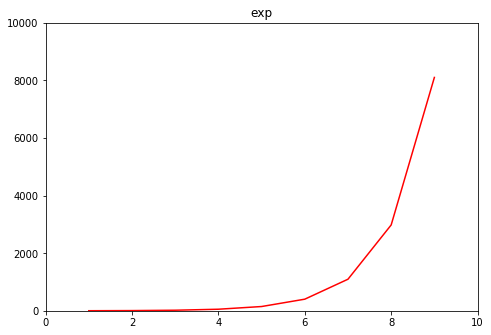

In [8]:
import matplotlib.pyplot as plt
fig=plt.figure()
a1=fig.add_axes([0,0,1,1]) #x,y, height 1,1. 
import numpy as np
x=np.arange(1,10) ,#1-9 
a1.plot(x,np.exp(x),'r') #red color for graph. of expential color. 
# np.exp(x) is going to give you you correspodning y values with respect to your x values, here it is is exponential function 
#of x
a1.set_title('exp')
#
a1.set_ylim(0,10000) #min is 0 to 10000 in y axis. 
a1.set_xlim(0,10)
plt.show()

In [ ]:
Tick are the markers denoting data points on axes, Matplotlib  automatically taken over the task of 
spacing points on the axisMatplotlib default tick locators and formatters are designed to be generally sufficient in many
common situations POSITION AND LABELS OF TICKS CAN BE EXplicitly mentioned to suit specigfic requirements.

The xticks andy yticks function can takes alist object as argument. The elemtn in the list
denot the positon on corrsponding acton where ticks will be displayed

ax.set_ticks([2.4.6.8,10])
This method will mark the data points at the given position with ticks 
Similarly labels corrsponding to tick marks canbe set by set_xlabels(0 and set_ylabels() functions respectively.
                                                                     ax.setxlabels(['two','four','six','eight','ten']
                                                                                  )


In [ ]:
This will display the text labels corresponding to tick marks can be set by set_xlabels() and set _ylabels()
functions respoectively.
ax.set_xlabel

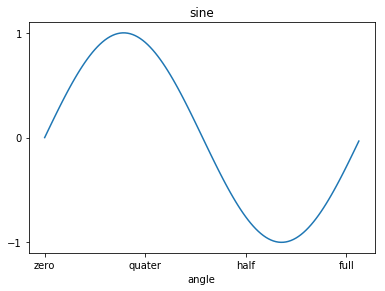

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import math
x=np.arange(0,math.pi*2,0.05) #same as before 
fig=plt.figure()
ax=fig.add_axes([0.1,0.1,0.8,0.8]) #x,y. height and weight. 
y=np.sin(x)
ax.plot(x,y)
ax.set_xlabel("angle")
ax.set_title("sine")
ax.set_xticks([0,2,4,6]) #in cm scale we have small ticks for milimeter..so basically xtick divides the x axis
#with marks...
ax.set_xticklabels(['zero','quater','half','full']) # these are the labels against each xticks
ax.set_yticks([-1,0,1])
plt.show()

In [ ]:
it is consisidered   have dual x or y axes in a figure, 

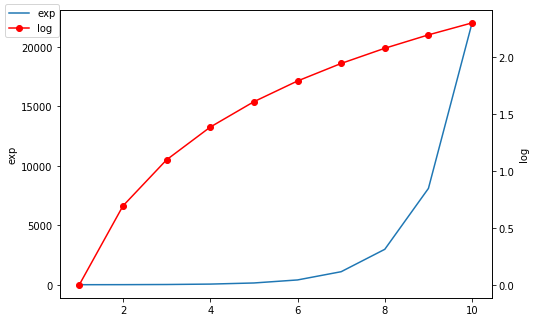

In [6]:
import matplotlib.pyplot as plt
import numpy as np
fig=plt.figure() #plot it with dual. 
a1=fig.add_axes([0,0,1,1])
x=np.arange(1,11) # it is going to create a list from 1 to 10 and allocate it to x.
a1.plot(x,np.exp(x)) #square it 
a1.set_ylabel('exp')
a2=a1.twinx() #function to allow dual access. 
a2.plot(x,np.log(x),'ro-') #red
a2.set_ylabel('log')
fig.legend(labels=['exp','log'],loc='upper left')
plt.show()

In [ ]:
A bar chart or bar graph that presents categorical data with rectangular bars with height and legnth proportional to values
..A bar graph shows comparison among discrete categories..One axis of the chart shows specific
categories being comparedand other axis representa measured value.
Matplotlib API provides the bar() function that can be used in

ax.bar(x, height, width, bottom, align)

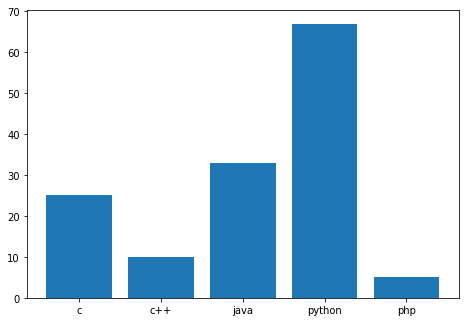

In [7]:
import matplotlib.pyplot as plt
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
langs=['c','c++','java','python','php']
students=[25,10,33,67,5]
ax.bar(langs,students)
plt.show()

In [ ]:
#when comparing several quantities and when changing one variable,we might want a bar chart
#when we have bars of one color for one quantity value.
#we can plot multiple bar charts by playing thickness and position of the bars. The data variable contains 
#three series of four values. The following script will show three bar charts of four bars.
#The bars will have thickness of 0.25 units.Each bar chart will be shifted .25 units from previous
#one.

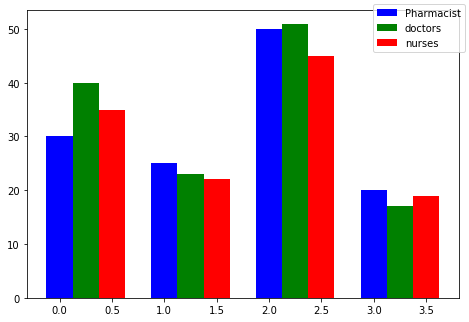

In [12]:
import numpy as np
import matplotlib.pyplot as plt
data=[[30,25,50,20],
[40,23,51,17],[35,22,45,19]]
x=np.arange(4) # this will give you values from 0 to 3  in a list that will be x
X=np.arange(4)# this will also give you values from 0 to 3 in big X
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.bar(X+0.00,data[0],color='b',width=0.25) #data of 30,25,50,20 
ax.bar(X+0.25,data[1],color='g',width=0.25)
ax.bar(X+0.50,data[2],color='r',width=0.25) #red takes more size
fig.legend(labels=['Pharmacist','doctors','nurses'],loc='upper right')


In [ ]:
The stacked bar chart that represent different groups on top of each other..The height
of the resulting bar show the combinedresult of the groups.
The optional bottom paramter of pyplot.bar() function allow you to specify a starting valuefor abar
Instead of running from zero to a value. It will go from the bottom to the value. The first call to 
pyplot.bar() plots the blue bar. The second call to pyplot.bar plots the red bar. with the bottom of the blue bar

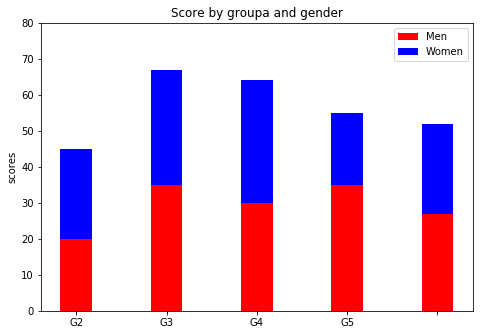

In [18]:
import numpy as np
import matplotlib.pyplot as plt
N=5
menMeans=(20,35,30,35,27)
womenMeans=(25,32,34,20,25)
ind=np.arange(N) #0-4
width=0.35
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.bar(ind,menMeans,width,color='r')
ax.bar(ind,womenMeans,width,bottom=menMeans,color='b')
ax.set_ylabel('scores')
ax.set_title('Score by groupa and gender')
ax.set_xticks(ind,('G1','G2','G3','G4','G5'))
ax.set_xticklabels(['G1','G2','G3','G4','G5'])
ax.set_yticks(np.arange(0,81,10)) #this is the y axis. this goes up by 10. to 80 
ax.legend(labels=['Men','Women'])
plt.show()

In [ ]:
A histogram is an accurate representation of numerical data It is an estimate of the probablity
distribution of a continious variable.
To construct a histogram, we have to follow  these steps
1.Bin the range of values
divide the entire range of values into a series of intervas
count how many values fall into each interval
The bins are usually specified as consecutive, non overlapping interval of a variable.
The matplotlib.pyplot.hist() function as consecutive, non overlapping intervals of a variable.


In [ ]:
x : array or sequence of arrays
bins : integer or sequence or auto or dividing the x axis into equal parts
range: the lower and upper range of the bins
density: if true the first element of the return tuple will be counts normalized to form a prabablity density
cumulative: if true then a hisogram  is computed where each bin gives the counts in that bin plus all bins 
    for smaller values
histype:the type of histogram to draw default is bar, barstacked,step --lineplot, stefilled --lineplot
#0-25 is 1 bin.
    

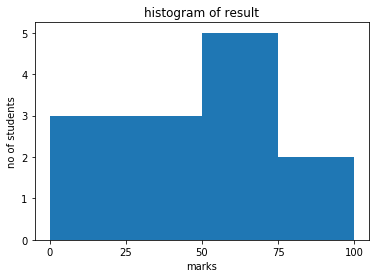

In [23]:
from matplotlib import pyplot as plt
import numpy as np
fig,ax=plt.subplots(1,1) #x,y 
a=np.array([22,87,43,56,73,55,54,11,20,51,79,31,27])
ax.hist(a,bins=[0,25,50,75,100])
ax.set_title("histogram of result")
ax.set_xticks([0,25,50,75,100])
ax.set_xlabel("marks")
ax.set_ylabel("no of students")
plt.show()

In [ ]:
Pie chart can only display one series of data, pie charts shows the size of items in one data series.
proportional to the sum of items. The data points in a pie chart are shown
as a percentage of the whole pie.
Matplotlib API has a pie function that generatea a pie diagram representing data in an array. The fractional 
area of each wedge is given by x/sum(x). If sum(x)<1 then the value of x give the fractional
area directly and the rarray will not be normalized. THe resulting pie will have an empty wedge of size 1- sum(x)

The pie chart looks best if the figure and axes are square or the axes aspect is equal.
x: array
    label
    colors
    autopct :string used to label thewedges with their numeric values.
        

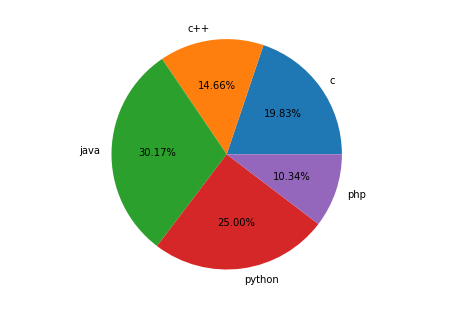

In [24]:
from matplotlib import pyplot as plt
import numpy as np
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.axis('equal')  #   there is no axis so we consider it as equal ..no difference in x and y axis
langs=['c','c++','java','python','php']
students=[23,17,35,29,12] #sum of all of this is 116. 23/116 is 19,83%. 
ax.pie(students,labels=langs,autopct='%1.2f%%') #gives you fractions 
plt.show()

In [ ]:
Scatter plot are used to plot data points on horizontal and vertical axis..in the attempt to show
how much one variable is affected by another..each row in the data table is represented by a marker the
position dpends on its value in the column set on the x and y axis..A third variable can be set to 
corresponding to the color or size of the markers thus adding yet another dimensions to the plot.


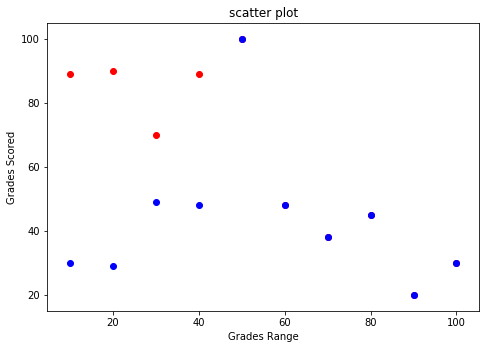

In [26]:
import matplotlib.pyplot as plt
girls_grades=[89,90,70,89,100,48,38,45,20,30]
boys_grades=[30,29,49,48,100,48,38,45,20,30]
grade_range=[10,20,30,40,50,60,70,80,90,100]
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.scatter(grade_range,girls_grades,color='r')
ax.scatter(grade_range,boys_grades,color='b')
ax.set_xlabel('Grades Range')
ax.set_ylabel('Grades Scored')
ax.set_title('scatter plot')
plt.show()

In [ ]:
Contour Plots: sometimes called level plots are ways to show a three dimensional surface on a 
    3 dimensional surface on a two dimensional plane..if graph has two variable x and y on its y asizx
    and response is z variable as a contours are sometimes called the z slices or iso response values.
    A contour plot is appropiate if you want to see how z changes as a function of twoo inputs x and y such
    that z=f(x,y) a contour line or isoline of a function of two variable is a curve along which the
    fuction has a constant value.
    the independent variable x and y are usually restricted to a regular grid called meshgrid.
    the numpy meshgrid creates a rectangular grid out of an array of x values and an array of y values.
    Matplotlib API contains contours and contour function that draw contour line and filled contours
    respectively both function needs parameters x,y ,x
    

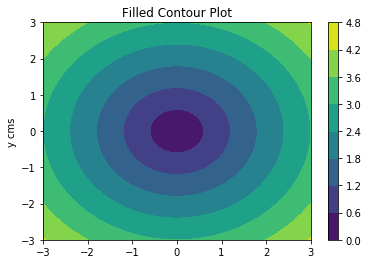

In [28]:
import numpy as np
import matplotlib.pyplot as plt
xlist=np.linspace(-3.0,3.0,100) #divide it into 100 parts. 
ylist=np.linspace(-3.0,3.0,100)
X,Y=np.meshgrid(xlist,ylist) # its is a bounday condition , your contour will not go outside it

Z=np.sqrt(X**2+Y**2)
fig,ax=plt.subplots(1,1) #x,y 
cp=ax.contourf(X,Y,Z) # this will draw the contours..as it is a equation of circle with x and y  variables
#z is the output. gives you the shape. 
fig.colorbar(cp) #contour plot. 
ax.set_title('Filled Contour Plot')
ax.set_ylabel('y cms')
plt.show()

In [ ]:
import plot display the velocity vectors as arrows with component

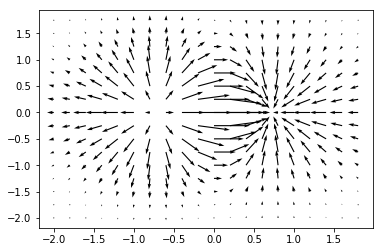

In [29]:
import matplotlib.pyplot as plt
import numpy as np
x,y=np.meshgrid(np.arange(-2,2,0.2),np.arange(-2,2,0.25))
z=x*np.exp(-x**2-y**2)
v,u=np.gradient(z,0.2,0.2)
fig,ax=plt.subplots()
q=ax.quiver(x,y,u,v)
plt.show()

#speed is scalar, velocity is direction. 20 mile per hour. at right direction is vector.


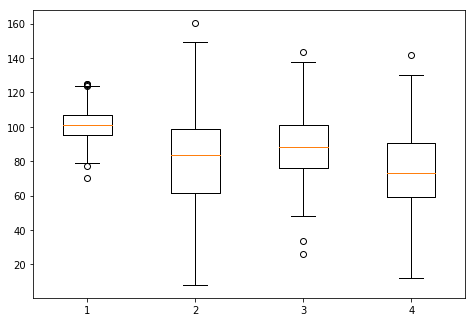

In [6]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(10) # this will seed the  points to start from 10
collection_1=np.random.normal(100,10,200)
collection_2=np.random.normal(80,30,200)
collection_3=np.random.normal(90,20,200)
collection_4=np.random.normal(75,25,200)
data_to_plot=[collection_1,collection_2,collection_3,collection_4]
fig=plt.figure()
ax=fig.add_axes([0,0,1,1]) #x,y, weight height.  
bp=ax.boxplot(data_to_plot)
plt.show()


In [ ]:
For random we are taking rand()
numpy.random.rand(d0,d1,d2....dn)
creates anarray of specified shape and fills it with random value
d0,d1,d2.........,dn...
dimension of the argument is given in a single python float
IF no argument is given python float is returned

In [7]:
import numpy as np
ar=np.random.rand(5)
print('random no ',ar)

random no  [0.99245869 0.56627113 0.51678645 0.88143397 0.0119134 ]


In [8]:
arrn=np.random.normal(0,0.1,1000)#first argument is loc, scale, size
#float or array_like : mean of distribution
#scale:standard deviation of the distribution
#size of data
print('random no', arrn)

random no [-9.04270996e-02  1.14889026e-01  1.04871689e-01  4.83552253e-02
 -1.17589052e-01 -2.25342706e-02 -2.05077067e-01 -2.73128206e-02
  5.83200754e-02 -1.40163224e-01 -8.50047666e-03 -1.49009608e-01
 -2.04876175e-01 -8.47395983e-02 -1.21756561e-01 -5.82982506e-02
 -1.02502104e-01 -3.90931406e-02  8.54564428e-02  5.50771782e-02
  1.00082133e-01 -1.04279492e-01  2.14495443e-01 -1.14087125e-02
 -1.09409273e-01  6.63876247e-03 -1.55437264e-01 -1.71864008e-01
 -9.95269597e-02 -1.80760403e-02 -2.01474455e-02 -1.68318955e-01
  2.92822677e-02  3.97626199e-02 -3.38651744e-02  3.96755570e-02
 -1.86256372e-02 -8.76352411e-02  4.82798423e-02  1.00664952e-01
 -4.92472756e-02  8.33292819e-02 -9.60168177e-02 -7.14498316e-02
  4.76809990e-03 -1.06946165e-01  1.16685084e-01 -5.69995057e-02
 -2.20700500e-02  1.14027330e-01  5.54470399e-02 -1.46671676e-01
  1.36294048e-02 -7.18002317e-03  6.23251372e-02  1.62010664e-02
  1.31497752e-02  5.82013104e-02 -8.90756248e-03  7.11578929e-02
 -1.11364250e-0

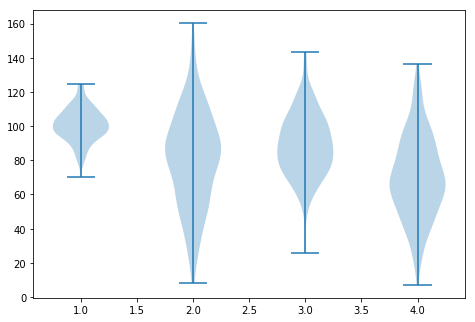

In [9]:
import matplotlib.pyplot as plt
np.random.seed(10)
collection_1=np.random.normal(100,10,200)
collection_2=np.random.normal(80,30,200)
collection_3=np.random.normal(90,20,200)
collection_4=np.random.normal(70,25,200)

data_to_plot=[collection_1,collection_2,collection_3,collection_4]
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
bp=ax.violinplot(data_to_plot)
plt.show()

In [ ]:
Violin plots are similar to box plots,except that they also shows the probablity density of data at
ddifferent values. These plots include a marker for the median of the data and box 
indiciating the interquartile rangle ias  in the standard box plots. Overlaid on this box
plot is a kernel density estimation. Like box plots violin plots are used to represent comparison
dof variable distribution or sample distribution across different categories

A violin is more informative than plain box plot.In fact while box plot only shows summary such as man median and iterquartile
ranges, the violin plot shos full distribution of data..

In [10]:
pip install mpl_toolkits

  Could not find a version that satisfies the requirement mpl_toolkits (from versions: )
No matching distribution found for mpl_toolkits
Note: you may need to restart the kernel to use updated packages.


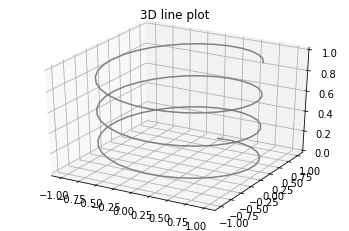

In [15]:
import numpy as np
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
fig=plt.figure()
ax=plt.axes(projection='3d')
z=np.linspace(0,1,100) #0-100 skips by 1. 
x=np.sin(20*z)
y=np.cos(20*z)
ax.plot3D(x,y,z,'gray')
ax.set_title('3D line plot')
plt.show()

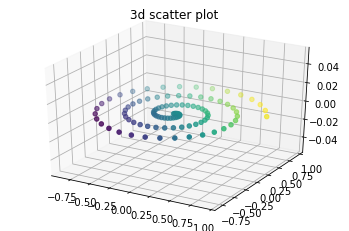

In [17]:
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt
fig=plt.figure()
ax=plt.axes(projection='3d')
z=np.linspace(0,1,100)
x=z*np.sin(20*z)
y=z*np.cos(20*z)
c=x+y
ax.scatter(x,y,c=c) #c represnets the color in the plot as we can see there is no of colors so 
# it lot different colors in a graph
ax.set_title('3d scatter plot')
plt.show()

In [ ]:
The ax.countor3D function creates a three dimensional plot. It requires all the innput 
data to be in the form of two dimensional regular grids with Z data evaluated at each points Here we will show
3d contour diagram

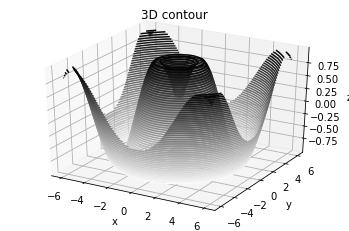

In [19]:
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt
def f(x,y):
    return np.sin(np.sqrt(x**2+y**2))
x=np.linspace(-6,6,30) #-6 30 
y=np.linspace(-6,6,30)
X,Y=np.meshgrid(x,y) # meshgrid is function that defines the boundaries of a plot
Z=f(X,Y)#calling f function with newly created values
fig=plt.figure()
ax=plt.axes(projection='3d')
ax.contour3D(X,Y,Z,50,cmap='binary')#cmap binary means black and white. 50 is number of grey color. 
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_title('3D contour')
plt.show()

In [ ]:
Seaborn heps to resolve following major project of matplotlib
1. Default matplotlib parameters
2. working with dataframe
Seaborn  is wrapper to matplotlib 
Searborn is built on top of python core visualization library
You can visualize univariate and bivariate data
fitting in and visual regression models
it comes with builtin themes



In [20]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [22]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sb
df=sb.load_dataset('tips')
print(df)

     total_bill   tip     sex smoker   day    time  size
0         16.99  1.01  Female     No   Sun  Dinner     2
1         10.34  1.66    Male     No   Sun  Dinner     3
2         21.01  3.50    Male     No   Sun  Dinner     3
3         23.68  3.31    Male     No   Sun  Dinner     2
4         24.59  3.61  Female     No   Sun  Dinner     4
5         25.29  4.71    Male     No   Sun  Dinner     4
6          8.77  2.00    Male     No   Sun  Dinner     2
7         26.88  3.12    Male     No   Sun  Dinner     4
8         15.04  1.96    Male     No   Sun  Dinner     2
9         14.78  3.23    Male     No   Sun  Dinner     2
10        10.27  1.71    Male     No   Sun  Dinner     2
11        35.26  5.00  Female     No   Sun  Dinner     4
12        15.42  1.57    Male     No   Sun  Dinner     2
13        18.43  3.00    Male     No   Sun  Dinner     4
14        14.83  3.02  Female     No   Sun  Dinner     2
15        21.58  3.92    Male     No   Sun  Dinner     2
16        10.33  1.67  Female  

In [23]:
print(sb.get_dataset_names())

['anscombe', 'attention', 'brain_networks', 'car_crashes', 'diamonds', 'dots', 'exercise', 'flights', 'fmri', 'gammas', 'iris', 'mpg', 'planets', 'tips', 'titanic']


/Users/user/anaconda3/lib/python3.7/site-packages/seaborn/utils.py:376: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 376 of the file /Users/user/anaconda3/lib/python3.7/site-packages/seaborn/utils.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  gh_list = BeautifulSoup(http)


In [24]:
df=sb.load_dataset('car_crashes')
print(df)

    total  speeding  alcohol  not_distracted  no_previous  ins_premium  \
0    18.8     7.332    5.640          18.048       15.040       784.55   
1    18.1     7.421    4.525          16.290       17.014      1053.48   
2    18.6     6.510    5.208          15.624       17.856       899.47   
3    22.4     4.032    5.824          21.056       21.280       827.34   
4    12.0     4.200    3.360          10.920       10.680       878.41   
5    13.6     5.032    3.808          10.744       12.920       835.50   
6    10.8     4.968    3.888           9.396        8.856      1068.73   
7    16.2     6.156    4.860          14.094       16.038      1137.87   
8     5.9     2.006    1.593           5.900        5.900      1273.89   
9    17.9     3.759    5.191          16.468       16.826      1160.13   
10   15.6     2.964    3.900          14.820       14.508       913.15   
11   17.5     9.450    7.175          14.350       15.225       861.18   
12   15.3     5.508    4.437          

In [ ]:
Visualizing data is one thing and furthur making the visualized data more pleasing is anotther thing
Aesthetics means a set of principles concerned with the nature and appreciation of beauty
expecially in art visualization
maplotlib library highly supports customization but knowing what settings totweak to acheive and 
attractive and anticipated plot is what we have to do.



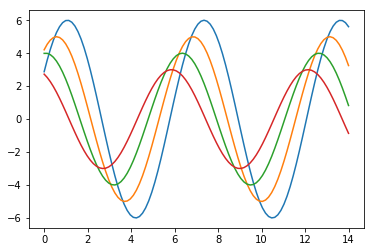

In [26]:
import numpy as np
from matplotlib import  pyplot as plt
def sinplot(flip=1): #change it, change i to 1,2,3 plot. changing the value of sign. 
    x=np.linspace(0,14,100) #0-100 with a skip of 14. 
    for i in range(1,5): #flip allows this iteration. 
        plt.plot(x,np.sin(x+i*0.5)*(7-i)*flip) #flip also changes from 1 to 2. 
sinplot()
plt.show()


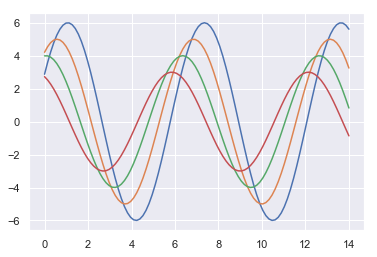

In [29]:
import numpy as np
from matplotlib import pyplot as plt
def sinplot(flip=1):
    x=np.linspace(0,14,100)
    for i in range(1,5):
        plt.plot(x,np.sin(x+i*0.5)*(7-i)*flip)
import seaborn as sb
sb.set()
sinplot()
plt.show()    

In [ ]:
Scaling plot elements
we also have control on plot elements and can control thescale of the plot using
the set_context(0 function, we have four preset template)

Paper
Notebook
Talk 
Poster
By default context is set o notebook 



In [ ]:
import numpy as np
from matplotlib import pyplot as plt
def sineplot(flip=1):
    x=np.linspace(0,14,100)
    for i in range(1,5):
        plt.plot(x,)

In [ ]:
Seaborn cColor Palette: Color plays an important role than any other aspect in visualization, when used 
    effectively, color adds more values to the plot. A palette means a flat surface on which painter
    arranges and mixes paints
    color_palette() is a function can be used to give colors to the plot and 
    addding aesthetics value to it.

    seaborn.color_palette(palette=None, _colors=None,dest=None)

In [ ]:
n_colors: number of colors in palette, If none the default will depend on how palette is specified
    By default the value of n_color is 6 colors
    desat proportionto desatuarate each color

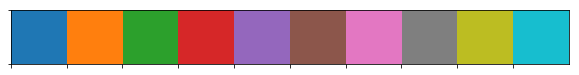

In [2]:
from matplotlib import pyplot as plt
import seaborn as sb
current_palette=sb.color_palette()
sb.palplot(current_palette)
plt.show()

In [ ]:
returns RGB tuple , by default seaborn has 
Deeo
Muted
Bright
Pastel
Dark
Colorblind
above mentioned are the avaialbe default color palette

you can also classify which color palette to use 
quantative
sequential
diverging
palplot is a function that deals with color palette


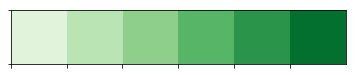

In [4]:
from matplotlib import pyplot as plt
import seaborn as sb
current_palette=sb.color_palette()
sb.palplot(sb.color_palette("Greens"))
plt.show()

In [ ]:
diverging palette use two different colors, Each color represents variation
in the vvalue ranging from a common point in either direction.
Assume plotting the data ranfing from -1 to 1. Thevalues from -1 to 0 takes one color
and 0 to +1 takes another color.
By default the values are centered from zero, you can control it with parameter center by 
passing a value.


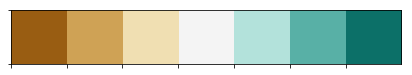

In [7]:
from matplotlib import pyplot as plt
import seaborn as sb
current_palette=sb.color_palette()
sb.palplot(sb.color_palette("BrBG",7)) #brown, blue green shade. 
plt.show()

In [ ]:
Ploting Univariate Distribution
Distribution of data is the foremost thing that we need to understand while analysing the data.
Here we will see how seaborn helps us in understanding the univariate distribution 
of the data.
Function displot() provides the most convenient way to take a quick look at univariate distribution
This function will plot a histogram that filts the kernel density estimation of data.

In [ ]:
seaborm.displot()
data->series 1d array of a list
bins specificaiton of hist bins
kde--bool


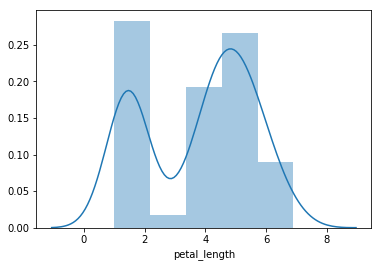

In [9]:
import pandas as pd
import seaborn as sb
from matplotlib import pyplot as plt
df=sb.load_dataset('iris')
sb.distplot(df['petal_length'],kde=True)
plt.show()

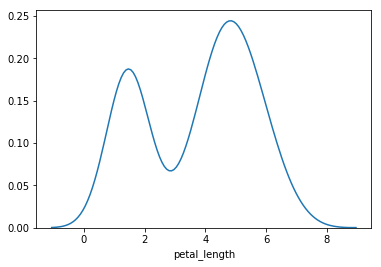

In [10]:
import pandas as pd
import seaborn as sb
from matplotlib import pyplot as plt
df=sb.load_dataset('iris')
sb.distplot(df['petal_length'],kde=True,hist=False)
plt.show()

In [ ]:
Kernel Density Estimation(KDE): is a way to estimate the probablity density function of a continious
    random variable. It is used for non parametric analysis
    

In [ ]:
If you have small number of variables we have to usehistogram in distplot
In case of large number of data points we have to KDE in displot

In [ ]:
UNIVARiATE : it is one variable in a distplot function...if you look at above plot
    we are plotting only one variable which is petal_length //thus this graph is univariate

In [ ]:
Bivariate: bivariate distribution is used to determine the relation between two variable.
    The best way to analyze bivariate distribtuion is using joinplot

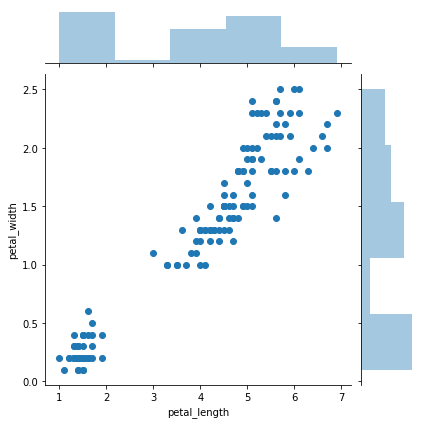

In [11]:
import pandas as pd
import seaborn as sb
from matplotlib import pyplot as plt
df=sb.load_dataset('iris')
sb.jointplot(x='petal_length',y='petal_width',data=df)
plt.show()

In [ ]:
Hexbin Plot: Hexagonal binning is used in bivariate data analyis when the data is sparse indensity
    i.e. when the data is very scatteredand difficult to analyze through scatterplots
    

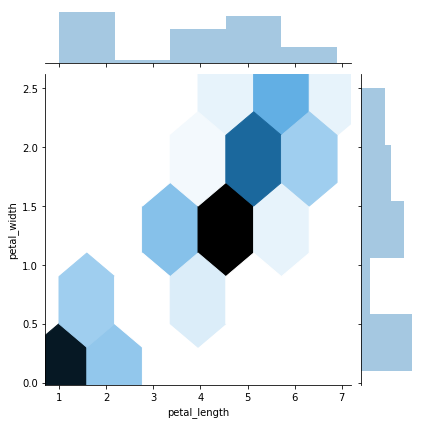

In [12]:
import pandas as pd
import seaborn as sb
from matplotlib import pyplot as plt
df=sb.load_dataset('iris')
sb.jointplot(x='petal_length',y='petal_width',data=df,kind='hex')
plt.show()

#large data. 

In [ ]:
Kernel Density Estimation

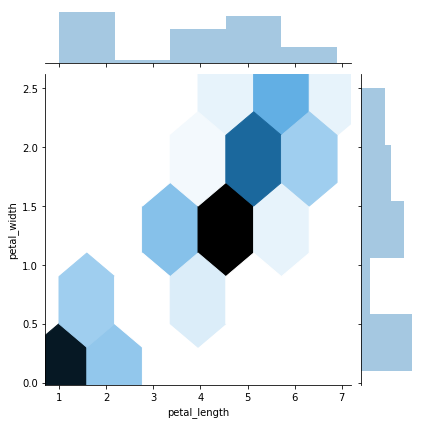

In [14]:
import pandas as pd
import seaborn as sb
from matplotlib import pyplot as plt
df=sb.load_dataset('iris')
sb.jointplot(x='petal_length',y='petal_width',data=df,kind='hex')
plt.show()

In [ ]:
Dataset under real time contains many variable...In such case relation between each
and every variable should be analyzed..Plotting Bivariate distribution for(n,2)
combnation of variable in a DataFrame as a matrix of plots
and diagonal plots are the univariate plots

In [ ]:
seaborn.pairplot(data,)
hue: variable in data to map plot aspect to differnt colors
palette: set of colors for mapping the hue variable
    kind: kind of plot for non identity replationships('scatter','reg')
        diag_kind: kind of plot for the diagonal subplots('hist','kde')
            
            
            
            
            

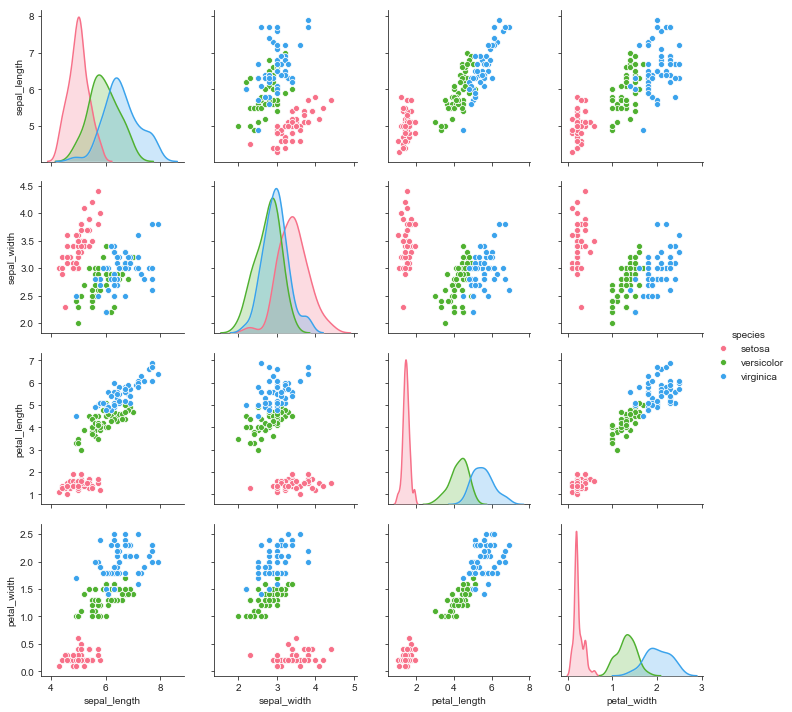

In [16]:
import pandas as pd
import seaborn as sb
from matplotlib import pyplot as plt
df=sb.load_dataset('iris')
sb.set_style('ticks')
sb.pairplot(df,hue='species',diag_kind='kde',kind='scatter',palette='husl')#husl is the one of the available c
#color palette with seaborn
#variable in data to map plot aspects to differnt colors
plt.show()

In [ ]:
Categorical Scatter Plots:
    stripplot()
    stripplot is used when one of the variable under study is categorial.It represents
    the data ..  
    

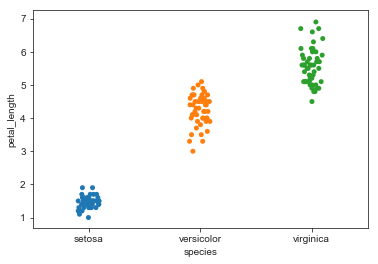

In [18]:
import pandas as pd
import seaborn as sb
from matplotlib import pyplot as plt
df=sb.load_dataset('iris')
sb.stripplot(x='species',y='petal_length',data=df,jitter=True)
plt.show()


In [ ]:
some times point on scatter plot overlaps..we use jitter parameter to handle this
jitter adds some random noise to the data ..This parameter will adjust the position
along with categorical axis.


In [ ]:
Another option which can be used as an alternate to Jitter is function swarnplot(). This function
position each point of scatter plot on categorical axis and thereby avoiding overlapping points.


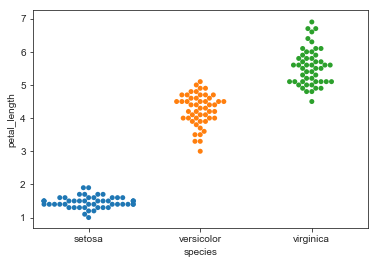

In [23]:
import pandas as pd
import seaborn as sb
from matplotlib import pyplot as plt
df=sb.load_dataset('iris')
sb.swarmplot(x='species',y='petal_length',data=df) #issue of overlap will be resolved. 
plt.show()

In [ ]:
Point Plots: point plots serve same as bar plots but in different style ..rather than full bar
    the value of the estimate is represented by the point at a certain height on the other 
    axis.

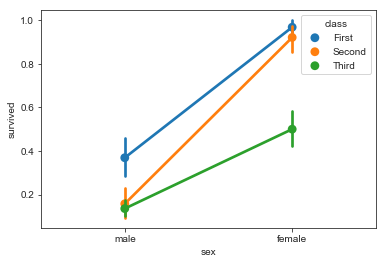

In [24]:
import pandas as pd
import seaborn as sb
from matplotlib import pyplot as plt
df=sb.load_dataset('titanic')
sb.pointplot(x='sex',y='survived',hue='class',data=df)
plt.show()

In [ ]:
Categorixal Data:  Categorical Data can be visualized using two plots, you can eiteher use
    the functions pointplot() or the higher level function factorplot()
Factorplot: Factor plot draws a categorical plot on a facegrid..using kind parameter we
    can choose the plot like boxplot, violin plot and striplot  FacelGrid uses poinplot by default.

/Users/user/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


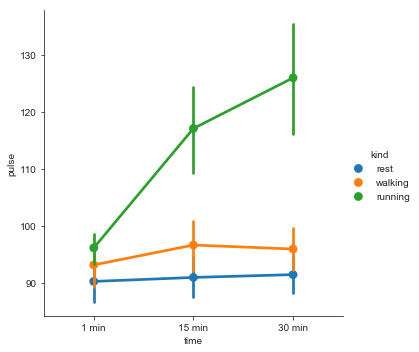

In [25]:
import pandas as pd
import seaborn as sb
from matplotlib import pyplot as plt
df=sb.load_dataset('exercise')
sb.factorplot(x='time',y='pulse',hue='kind',data=df)
plt.show()

/Users/user/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


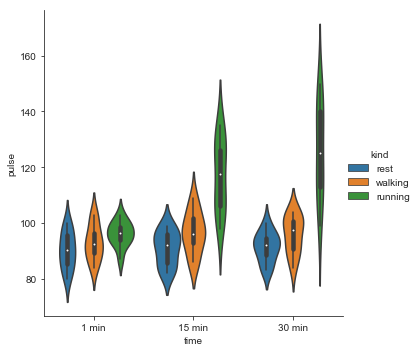

In [30]:
import pandas as pd
import seaborn as sb
from matplotlib import pyplot as plt

df=sb.load_dataset('exercise')
sb.factorplot(x='time',y='pulse',hue='kind',kind='violin',data=df)
plt.show()

In [ ]:
Functions toDraw Linear Regression Models:
    There are two main functions in seaborn to visualize a linear relationship determined 
    through regression. These functions are regplot() and implot()
    
    regplot: accepts the x and y variables in a variety of formats
        including simple numpy arrays andas series objects or as references
        to variables in a pandas DataFrame.
    implot: has data as required parameter and the x and y variables. must be specified 
        as  string This data form is called long form data

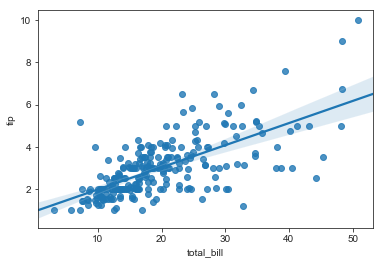

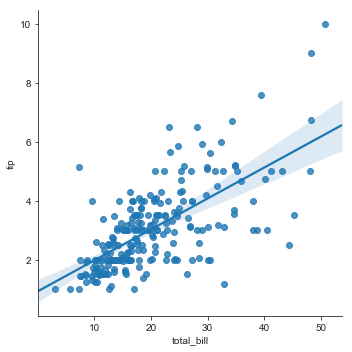

In [32]:
import pandas as pd
import seaborn as sb
from matplotlib import pyplot as plt
df=sb.load_dataset('tips')
sb.regplot(x='total_bill',y='tip',data=df)
sb.lmplot(x='total_bill',y='tip',data=df)
plt.show()

   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4
(244, 7)
<bound method NDFrame.describe of      total_bill   tip     sex smoker   day    time  size
0         16.99  1.01  Female     No   Sun  Dinner     2
1         10.34  1.66    Male     No   Sun  Dinner     3
2         21.01  3.50    Male     No   Sun  Dinner     3
3         23.68  3.31    Male     No   Sun  Dinner     2
4         24.59  3.61  Female     No   Sun  Dinner     4
5         25.29  4.71    Male     No   Sun  Dinner     4
6          8.77  2.00    Male     No   Sun  Dinner     2
7         26.88  3.12    Male     No   Sun  Dinner     4
8         15.04  1.96    Male     No   Sun  Dinner     2
9         14.78  3.23    Male     No   Sun  Dinner     2
10    

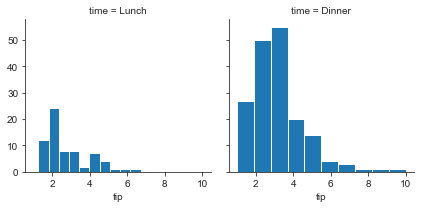

In [38]:
import pandas as pd
import seaborn as sb
from matplotlib import pyplot as plt
df=sb.load_dataset('tips')
print(df.head())
print(df.shape)
print(df.describe)
g=sb.FacetGrid(df,col='time') #1 row and 2 columns 
g.map(plt.hist,'tip')
plt.show()

In [ ]:
Numpy : numerical python:
        it is a library consist of multidimensional array objects and collection of routine or function
        for processing those arrays. Using numpy mathematical and logical operations on array can be
        be performed.  
        
        Fouries trasforms and routines for shape manipulation
        operations related to linear algebra, Numpy has in built fnctions fr linear algebra and randon number genration
        

In [ ]:
Numpy its a replacement of MATLAB: Matrix labratory :  The most important object defined 
        in numpy is an N dimensional array type called ndarray.It describes the collection
        of items of the same type.Items in the collection can be acessed using zero based index.
        Every item in an ndarray takes the same size of blocks in the memory Eachelement in ndarray 
        is an object of data type object called dtype
        
        Any item extracted from ndarray object is represented by a Python object of 
        one of the array scaar types.

In [ ]:
numpy.array(object,dtype=None,copyTrue,order=None,subok=False,dmin=0)
object :Any object exposing the array interface method returns an array or nested sequence
dtype: desired datatype of array
copy by default true the object is copies
order : C row major or F column major or A for any
subok: returned array forced to be base class array
ndmin: specifies minimum dimensions of resulting array
    
    

In [39]:
import numpy as np
a= np.array([1,2,3])
print(a)

[1 2 3]


In [40]:
import numpy as np
b=np.array([[1,2],[2,3]])
print(a)

[1 2 3]


In [42]:
import numpy as np
c=np.array([1,2,3,4,5],ndmin=2) #ndim is the parameter where we specify the no of dimension our array will have
print(c)

[[1 2 3 4 5]]


In [43]:
import numpy as np
d=np.array([1,2,3],dtype=complex) # here we can specify the data type which we want
print(d)

[1.+0.j 2.+0.j 3.+0.j]


In [ ]:
Numpy support a much greater variety of numerical types than python does. The following table shws
different scalar data types defined in NumPy

bool_: boolean ( True or False) stored as a byte
int_ : default integer type( same as C long normally either int64 or int32)
intc : identical to C int
intp: integer used for indexing (same as C size_t normally either int32 or int64)
int8 byte (-128 to 127)
int16 Integer(-32768 to 32767)
uint8 Unasigned integer (0 to 255)
float_ shorthand for float 
complex shorthand for complex

In [ ]:
Numpy numerical types are instance of dtype objects each having unique characteristics. The dtype 
are available as np.bool_, np.float32 etc
A data type object describes interpretation of fixed block of memory corresponding to an array
depending on the following aspects
Type of data( integer float or python object)
Size of data
Byte order (little endian or big endian)
In case of structure type the names of fields data type of each field and part of the memory
block taken by each field
If data type is a subarray its shape and datatype


In [ ]:
The byte order is deciding by prefixing < or > to data type < means that encoding is little endian 9 least 
significant is stored in smalled address> means ending is big endian (most significatent byte is stored in smallest 
                                                                    address)

In [44]:
import numpy as np
dt=np.dtype(np.int32) # in numpy array evry list has a datatype...
#and datatype has to be specifed to njumpy we can specify it using 
#dtype function..int32 is an integer of 32 bits
print(dt)

int32


In [3]:
import numpy as np
dt=np.dtype([('age',np.int8)]) #
a=np.array([(10,),(20,),(30,)],dtype=dt)
print(a['age'])

[10 20 30]


In [4]:
import  numpy as np 
urprint(student thee following exampl defins a str
      

[('name', 'S20'), ('age', 'i1'), ('marks', '<f4')]


In [5]:
import numpy as np
student=np.dtype([('name','S20'),('age','i1'),('marks','f4')])
a=np.array([('abc',21,50),('Sourabh',21,66),('Rahul',15,17)],dtype=student)
print(a)
#b represents the binary #age and mark of students. 


[(b'abc', 21, 50.) (b'Sourabh', 21, 66.) (b'Rahul', 15, 17.)]


In [ ]:
ndarray.shape # this is the array attribute that returns the tuple consisting of array dimension
#it can also be used to resize the array..

In [6]:
import numpy as np
a=np.array([(1,2,3),(4,5,6)]) #2 rows and 3 columns. 
print(a.shape)

(2, 3)


In [8]:
import numpy as np
a=np.array([[1,2,3],[4,5,6]])
print(a)
a.shape=(3,2) # this iscalled resizing of a numpy array
print(a)

[[1 2 3]
 [4 5 6]]
[[1 2]
 [3 4]
 [5 6]]


In [9]:
import numpy as np
a=np.arange(24)
print(a)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]


In [12]:
import numpy as np
a=np.arange(24)
print(a)
a.ndim
print(a.ndim)

# now reshape it
b=a.reshape(2,4,3) #4 rows and 3 columns.  2 is 2 matrixes. 
print(b)
print(b.ndim)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
1
[[[ 0  1  2]
  [ 3  4  5]
  [ 6  7  8]
  [ 9 10 11]]

 [[12 13 14]
  [15 16 17]
  [18 19 20]
  [21 22 23]]]
3


In [17]:
#numpy.itemsize : this array attribute returns the length of each element of array in bytes
import numpy as np
x=np.array([1,2,3,4,5],dtype=np.int8) #shows one 16 will multiple it by 2. 
print(x.itemsize)

1


In [19]:
#numpy.itemsize : this array attribute returns the length of each element of array in bytes
import numpy as np
x=np.array([1,2,3,4,5],dtype=np.float32) #shows one 16 will multiple it by 2. 
print(x.itemsize)

4


In [ ]:
#numpy flags: the ndarray object has the following attributes.Its current value are returned by this function.
C_CONTIGIOUS(C):  The data is in a single, C stype contigious segment
F_CONTIGIOUS(F): The data is in a single Fortran stype contigious segment
OWNDATA(O): The array owns the memory it uses or borrows it from another object
WRITEABLE(W): The data area can be writtern to, Setting this to false locks the data making it read only
ALIGNED(A):The data and all elemnts are aligned appropiately for the hardware
UPDATEIFCOPY(U): This array is a copy of some other array,When this array is deallocated. the base array will
be updated with the content of this array.


In [21]:
import numpy as np
x=np.array([1,2,3,4,5]) #gives tou property of flag. in memory all will stored in a sequence. 
print(x.flags)

  C_CONTIGUOUS : True
  F_CONTIGUOUS : True
  OWNDATA : True
  WRITEABLE : True
  ALIGNED : True
  WRITEBACKIFCOPY : False
  UPDATEIFCOPY : False


In [ ]:
numpy.empty
It creates an unintialized array of specified shape and dtype.numpy.empty(shape,dtype=float,order='C')
Shape :Shape of an empty array in int or tuple of int
Dtype:desired output data type.optional

In [22]:
import numpy as np
x=np.empty([3,2],dtype=int)
print(x)

[[1 2]
 [3 4]
 [5 6]]


In [23]:
import numpy as np
x=np.zeros([3,2],dtype=int)
print(x)

[[0 0]
 [0 0]
 [0 0]]


In [24]:
import numpy as np
x=np.zeros((5,),dtype=np.int)
print(x)
#you can also specify the array shape liek this (5,) that means 5 coloumns and 1 row


[0 0 0 0 0]


In [ ]:
numpy.ones(shape,dtype=None,order='C')
Shape:Shape of an empty array int or tuple of int
Dtype: desired output data type
    

In [25]:
import numpy as np
x=np.ones(5)
print(x)

[1. 1. 1. 1. 1.]


In [27]:
import numpy as np
x=np.ones([2,2],dtype=int)
print(x)

[[1 1]
 [1 1]]


In [ ]:
Numpy.asarray
This function is similar to numpy.array except for the fact it has fewer parameters
This routine is useful for converting python sequence into ndarray
numpy.asarray(a,dtype=None,order=None)
a:Input data in any form such as list, list of tuples, tuple of tuples or tuple of lists
dtype: By default, the data type of input data is applied to the resultant ndarra
order:C (row major), F column major
    

In [28]:
import numpy as np #it takes list variable and convert it into numpy array. (asrray)
x=[1,2,3]
a=np.asarray(x)
print(a)

[1 2 3]


In [29]:
import numpy as np
x=[1,2,3]
a=np.asarray(x,dtype=float)
print(a)

[1. 2. 3.]


In [30]:
import numpy as np
x=[1,2,3]
a=np.asarray(x)
print(a)

[1 2 3]


In [31]:
import numpy as np
x=[(1,2,3),(4,5)]
a=np.asarray(x)
print(a)


[(1, 2, 3) (4, 5)]


In [ ]:
numpy.frombuffer
#This function interprets a buffer as one dimensional array, Any object that exposes the buffer interface
#is used as parameter to return asn ndarray
numpy.frombuffer(buffer,dtype=float,count=-1,offset=0)
buffer:Any object that exposes buffer interface
dtype: data type of returned ndarray, default to float
count: the number of items to read, default -1 means all data
offset: the starting position to read from default is 0


In [40]:
import numpy as np
a='Hello World'
a=np.frombuffer((a),dtype='S1')
print(a)

AttributeError: 'str' object has no attribute '__buffer__'

In [39]:
numpy.fromiter
This function builds a ndarray object from any iterable object.A new one dimensional array is 
returned by this function/
numpy.fromiter9iterable,dtype,count=-1


SyntaxError: invalid syntax (<ipython-input-39-114dae842816>, line 2)

In [43]:
import numpy as np
lst=range(5)
print(lst)

range(0, 5)


In [45]:
#iteration
import numpy as np
lst=range(5)
it=iter(list)
#using iterator to create ndarray
x=np.fromiter(it,dtype=float)
print(x)

[0. 1. 2. 3. 4.]


In [47]:
import numpy as np
x=np.arange(5)
print(x)

[0 1 2 3 4]


In [46]:
import numpy as np
x=np.arange(10,20,2)
print(x)

[10 12 14 16 18]


In [ ]:
numpy.linspace
This is similar function to arange except instead of step size
, thew number of evenly spaced values between the interval is specified.
np.linspace(start,stop,num,endpoint,retstep,dtype)
start:starting value
    stop whenre t op
    
     num the number of evenly spaced samples to be generated
        default is 50
retstep: if true sample and step between consecutive numbers
    
    dtype: data type of output
        
    
    
     

In [48]:
import numpy as np
x=np.linspace(10,20,5) #10/5 =2.5  how to get to 20 is using 0. 2.5. 2.5 5. 7.5. 10 4 of thm to 20. using 5  
print(x)

[10.  12.5 15.  17.5 20. ]


In [49]:
import numpy as np
x=np.linspace(10,20,5,endpoint=False)
print(x)
#we step it as 2 since 20 isnt shown. 

[10. 12. 14. 16. 18.]


In [50]:
import numpy as np
x=np.linspace(1,2,5,retstep=True)
print(x)
#retstep here is 0.25

(array([1.  , 1.25, 1.5 , 1.75, 2.  ]), 0.25)


In [ ]:
numpy.logspace: This function returns an ndarray object that contains the numbers that are 
    evenly spaced on a log scale
    start and stop endpoints of the scale are indices of the base usually 10

numpy.logspace(start,stop,num,endpoint,base,dtype)
base of log space default is 10
dtype: ata type of output array, if not given it depends upon their input argument


In [52]:
import numpy as np
a=np.logspace(1.0,2.0,num=10)
print(a)

[1.e+001 1.e+112 1.e+223     inf     inf     inf     inf     inf     inf
     inf]


/Users/user/anaconda3/lib/python3.7/site-packages/numpy/core/function_base.py:279: RuntimeWarning: overflow encountered in power
  return _nx.power(base, y)


In [53]:
import numpy as np
a=np.logspace(1.0,10.0,num=10,base=2)
print(a)

# when sometimes you getvalues which are very small that cant be drawn...so we have to scale it to large size
#so how we can plot it using logspace ...will increate its size by log2 into 10 parts.
#log2=20
#10 numbers. log is squaring it. 


[   2.    4.    8.   16.   32.   64.  128.  256.  512. 1024.]


In [ ]:
Numpy Indexing and Slicing
Contents of ndarray objects can be accessed and modified by indexing or slicing..just like python nbuilt 
container objects 

items in ndarray object follows  zero based index.These types of indexing methods are available. field acces, 
basic slicing and advanced indexing.

Basic slicing is an extension of pythons basic concept of slicing to n dimensions.A python slice object
is constructed by giving start stop and step parmeters to the built in slice function.
This slice object passed to the array to extract a part of array.


In [4]:
import numpy as np
a=np.arange(10)
s=slice(1,7,2) #2 is the starting point and 7 is the ending point. slices whole array from 0 to 9 2 to 7. then it 
#takes a stepsize of 2. 1,3,5 from slice array of 1-7
print(a[s])

[1 3 5]


In [5]:
import numpy as np
a=np.arange(10)
b=a[1:7:2] # you can write it this way also just like in line no 3 of cell 4
print(b)

[1 3 5]


In [6]:
import numpy as np
a=np.array([[1,2,3],[3,4,5],[4,5,6]])
print(a)

print("Now we will slice the array from the index s[1:]")
print(a[1:])

[[1 2 3]
 [3 4 5]
 [4 5 6]]
Now we will slice the array from the index s[1:]
[[3 4 5]
 [4 5 6]]


In [7]:
import numpy as mp
a=np.array([[1,2,3],[3,4,5],[4,5,6]])
print('our array of is')
print(a)
print('\n')

#his returns array of items in the second column
print(a[...,1])
print('\n') # all values of  second column 

print('The items in second row')
print(a[1,...])
print('\n')

# Now we will slice all items from column1 onwards
print(a[...,1:])

our array of is
[[1 2 3]
 [3 4 5]
 [4 5 6]]


[2 4 5]


The items in second row
[3 4 5]


[[2 3]
 [4 5]
 [5 6]]


In [ ]:
It is possible to make a selection from ndarrayhat is non tuple sequence,ndarray object of integer or 
Boolean data type or tuple with atleast one item being a seuqnce object. Advanced indexing
always retursn a copy of the data. As against slicing only present a view..
There are two types of advanced indexing  Integer and Boolean...

Indexing Indexing: This mechanism helps in selecting any arbitary item i an array based to ndimensional index
    Each integer array represents the number of indexes into that dimension.When the index consist of as many integer
    arrays  the dimensions of the target ndarray it becomes straightforward
    one element of specified column from each row of ndarray object is selected
    Hence tehe tow index contains all row numbers and the column index specifes the eleent to be selected.
    

In [8]:
import numpy as np
x=np.array([[1,2],[3,4],[5,6]])
y=x[[0,1,2],[0,1,0]] #rows, then columns 
print(y)

[1 4 5]


In [9]:
import numpy as np
x=np.array([[0,1,2],[3,4,5],[6,7,8],[9,10,11]])
print('Our array is :')
print(x)
print('\n') #1,4,7,10 

rows=np.array([[0,0],[3,3]])#row 0 and 3.
cols=np.array([[0,2],[0,2]]) #0 columsn and 2.
y=x[rows,cols]
print("The corner elemtns of this array are:")
print(y)

Our array is :
[[ 0  1  2]
 [ 3  4  5]
 [ 6  7  8]
 [ 9 10 11]]


The corner elemtns of this array are:
[[ 0  2]
 [ 9 11]]


In [13]:
import numpy as np
x=np.array([[0,1,2],[3,4,5],[6,7,8],[9,10,11]])
print('Our arrayi is')
print(x)
print('\n')
z=x[1:4,1:3]
print('after slicing it look s like this')
print(z)

#using advanced index for column
y=x[1:4,[1,2]] #1,2 is from 0 
print(y)

Our arrayi is
[[ 0  1  2]
 [ 3  4  5]
 [ 6  7  8]
 [ 9 10 11]]


after slicing it look s like this
[[ 4  5]
 [ 7  8]
 [10 11]]
[[ 4  5]
 [ 7  8]
 [10 11]]


In [ ]:
Boolean array indexing : This type of advanced indexing is used when the resultant object
    is meant to be the result of boolean operations such as comparison operators
items greater than 5 are returned as a result of boolean indexing

In [14]:
import numpy as np
x=np.array([[0,1,2],[3,4,5],[6,7,8],[9,10,11]])
print('Our array is\n')
print(x)
print('\n')
# now we will print the items greater than 5
print('The items greater than 5 are')
print(x[x>5])

Our array is

[[ 0  1  2]
 [ 3  4  5]
 [ 6  7  8]
 [ 9 10 11]]


The items greater than 5 are
[ 6  7  8  9 10 11]


In [ ]:
Nan (Not a Number ) elements are omitted by using ~ complemnt operator


In [15]:
import numpy as np
a=np.array([np.nan,1,2,np.nan,3,4,5])
print(a) # the original array
print(a[~np.isnan(a)]) # array without not a number values

[nan  1.  2. nan  3.  4.  5.]
[1. 2. 3. 4. 5.]


In [16]:
import numpy as np
a=np.array([1,2+6j,5,3.5+5j]) # shows how to filter out the non complex eleents from an array
print(a[np.iscomplex(a)])

#1 and 2 are regular numbers. 


[2. +6.j 3.5+5.j]


In [ ]:
The term broadcasting refers to the ability of Numpy to treat arrays of differnet shapes
during arithemetic operations on arrays are usually done on corresponding elements.If two arrays are
of exacctly the same shape, then these oeprations are smoothly performed.


In [17]:
import numpy as np
a=np.array([1,2,3,4])
b=np.array([10,20,30,40])
c=a*b
print(c)

[ 10  40  90 160]


In [ ]:
If the dimension of two arrays are dissimilar elemtn to element operations are not possible.
However operations on arrays of non similar shapes possible in Numpy because of the broadcasting
capability. the samller array is broadcast to the size of the larger array so that they have compatible
shape..
Broadcasting is possible if the following rules are satisfied
Array with smller ndim than other is prepended with 1 in its shape
size ofin each dimension of the output shape is maximum of the input size in that dimension
An input can be used in calculation if its size in a particular dimensio matches the output size or its values is exactly 1
if an input has dimension size of 1 the first data entry in that dimensionis used for all calculation

In [18]:
import numpy as np
a=np.array([[0.0,0.0,0.0],[10.0,10.0,10.0],[20.0,20.0,20.0],[30.0,30.0,30.0]]) #float 
b=np.array([1.0,2.0,3.0])
print('First array is \n')
print(a)
print('\n')
print('second array is ')
print(b)
print('\n')
print(a+b) #we acan add if there is a 0 in there. 

First array is 

[[ 0.  0.  0.]
 [10. 10. 10.]
 [20. 20. 20.]
 [30. 30. 30.]]


second array is 
[1. 2. 3.]


[[ 1.  2.  3.]
 [11. 12. 13.]
 [21. 22. 23.]
 [31. 32. 33.]]


In [ ]:
NumPy : Iterating over arrays
    : Numpy package contains an iterator object numpy.nditer It is an efficient multidimensional iterator
        object using which it is possible to iterate over an array Each elemtn of an array is visiting
        using pythons stanard iterator interface 
Supporse you have 3X4 array using arange() function and iterate over it using nditer


In [19]:
import numpy as np
a=np.arange(0,60,5)
a=a.reshape(3,4)
print('riginal array is ')
print(a)

print('Modified array ois')
for x in np.nditer(a):
    print(x)

riginal array is 
[[ 0  5 10 15]
 [20 25 30 35]
 [40 45 50 55]]
Modified array ois
0
5
10
15
20
25
30
35
40
45
50
55


In [ ]:
 The order of iteration is choosen to match the memory layout of an array without considering a
    particular ordering. This can be seen by iterating over the transpose of the above array
    

In [20]:
import numpy as np
a=np.arange(0,60,5)
a=a.reshape(3,4)
print('Original array is :')
print(a)
print('\n')

print('Transpose of the original array is')
b=a.T #tranpose of a matrix. rotates the matrix. 
print(b)
print('\n')

print('Modified array is')
for x in np.nditer(b): #n dimension whenever you want to loop through each element of numpy array 
    # you have to use niter..dimension iterator ..through which you can move forward in an array
    print(x)
    #0,5,10,15,20,25,30 from our transpose. 
    


Original array is :
[[ 0  5 10 15]
 [20 25 30 35]
 [40 45 50 55]]


Transpose of the original array is
[[ 0 20 40]
 [ 5 25 45]
 [10 30 50]
 [15 35 55]]


Modified array is
0
5
10
15
20
25
30
35
40
45
50
55


In [ ]:
Array Manipulation: Several functions are available in numpy library for manipulation of elements in ndarray 
    object.

reshape: Gives a new shape to an array without changing its data
flat: A 1-D iterator over the array
flatten: returns a copy of the array collapsed into one dimesnsio
ravel: return a contigious flattened array'


In [ ]:
transpose: permutes the dimensions of an array
ndarray.T : same as abvepermutes the dimension of an array
rollaxis: rolls the specified axis backwards
swapaxes: interchange the two axes of an array


In [ ]:
Changing dimensions 
broadcast: produce an object that mimics broadcasting
    broadcast_to: broadcast an array to new shape
    expand_dims:expands an arrray to new shape
    squeeze: removes single dimensional entries from the shape of an array

Joining Arrays
 concatenate: joins a seuqnece of arrays along an existing aixs
 stack: join a sequence of arays along a new axis
 hstack: stacks arrays in sequence horizontally 
 vstack: stacks arrays in a sequence vertially (row wise)

Splitting Arrays:
    split: split an array into multiple sub arrays
    hsplit:split an array into multiple sub arrays
    split split array into multiple sub arrays vertically (row wise)

Adding/removing elemnts
 size: returns a new array with speciifed shape
        append :append the value to the new end ofan array
        insert
        delete
        unique: finds unique elements of an array
            

In [ ]:
Numpy String function
add(): returns elemnt wise string concatenation for two arrays of str or unicode
multiply(): returns the string with multiple concatenation, element wise
enter(): returns a copy of the given string with elements centered in a string of specified length
capitalize(): returns a copy of the string with only first character capitalized
title():returns the elementwise title cased version of the string or unicode
lower(): retunrs an array of elemnts converted to lowercase
upper(): returns an array with elements converted to uppercase
split() returns a list of the words in the string using seperator delimiter
splitlines(): retuurns a lsit of lines in the lement breaking at he line boundaries
strip():returns a copy with the leading and trailing characters removed
join(): returns a stringwhich is the concatenation of the string  in the sequence
replace():  returns a copy of the string with all occurences of substring replaced by the new string
decpde(): ca;; str.decode elemnt wise
encode calls str.encode element wise
    
    

In [21]:
import numpy as np
a=np.array([0,30,45,60,90])
print(' sine of differnt angl;es')
print(np.sin(a*np.pi/180))
print('\n')

print('cosine values for angles in array')
print(np.cos(a*np.pi/180))
print('\n')

print('Tanglent values for angles')
print(np.tan(a*np.pi/180))

 sine of differnt angl;es
[0.         0.5        0.70710678 0.8660254  1.        ]


cosine values for angles in array
[1.00000000e+00 8.66025404e-01 7.07106781e-01 5.00000000e-01
 6.12323400e-17]


Tanglent values for angles
[0.00000000e+00 5.77350269e-01 1.00000000e+00 1.73205081e+00
 1.63312394e+16]


In [22]:
import numpy as np
a=np.array([0,30,45,60,90])
print('Array containing sine values')
sin=np.sin(a*np.pi/80)
print(sin)

print('compute sine inverse of angles, returned values are in radians')
inv=np.arcsin(sin) #arc sin is the inverse of sin. 
print(inv)
print('\n')

print('Check result by converting to degrees')
print(np.degrees(inv)) #pass values you will get converted values. 
print('arc cos and arc tan functions behave similarly')
cos=np.cos(a*np.pi/180)
print(cos)
print('\n')

print('inverse of cos')
inv=np.arccos(cos)
print(inv)

print('In degreees')
print(np.degrees(inv))
print('\n')

print('tan function')
tan = np.tan(a*np.pi/180)
print(tan)
print('\n')

print('in degree')
print(np.degrees(inv))


Array containing sine values
[ 0.          0.92387953  0.98078528  0.70710678 -0.38268343]
compute sine inverse of angles, returned values are in radians
[ 0.          1.17809725  1.37444679  0.78539816 -0.39269908]


Check result by converting to degrees
[  0.    67.5   78.75  45.   -22.5 ]
arc cos and arc tan functions behave similarly
[1.00000000e+00 8.66025404e-01 7.07106781e-01 5.00000000e-01
 6.12323400e-17]


inverse of cos
[0.         0.52359878 0.78539816 1.04719755 1.57079633]
In degreees
[ 0. 30. 45. 60. 90.]


tan function
[0.00000000e+00 5.77350269e-01 1.00000000e+00 1.73205081e+00
 1.63312394e+16]


in degree
[ 0. 30. 45. 60. 90.]


In [ ]:
Functions for rounding: numpy.around()
numpy.around(a,decimals)
a: input data
    decimanls
    The number of decimals to round to default is 0 if negative the integer is rounded to position to the left of the decimal poi

In [2]:
import numpy as np
a=np.array([1.0,5.55,123,0.567,25.532])
print('original array')
print(a)
print('\n')
print('After rounding')
print(np.around(a))
print(np.around(a,decimals=1))
print(np.around(a,decimals=-1)) #original and up and down 

original array
[  1.      5.55  123.      0.567  25.532]


After rounding
[  1.   6. 123.   1.  26.]
[  1.    5.6 123.    0.6  25.5]
[  0.  10. 120.   0.  30.]


In [ ]:
numpy.floor  The function returns the largest integer  not greater than input parameter.
The floor of the scalar x is the largest integer i, such that i<=x.
flooring alwats rounded away from 0


In [3]:
import numpy as np
a=np.array([-1.7,1.5,-0.2,0.6,10])
print('the given array is ')
print(a)
print('\n')

print('The givenarray')
print(np.floor(a)) #gives you the lower number. this is called s floor. 



the given array is 
[-1.7  1.5 -0.2  0.6 10. ]


The givenarray
[-2.  1. -1.  0. 10.]


In [ ]:
umpy.ceilfunction 
 The ceil function returns the ceiling of an input value i.e ceil of the scalar x is the smallest intger
    i .such that i>=x
    

In [5]:
import numpy as np
a=np.array([-1.7,1.5,-0.2,0.6,10])
print('The demo array is ')
print(a)
print('\n')
print('The modified array')
print(np.ceil(a))

The demo array is 
[-1.7  1.5 -0.2  0.6 10. ]


The modified array
[-1.  2. -0.  1. 10.]


In [ ]:
Arithemtetic operations such as add(), substract(), multiply() and divide(0 must be either of the same )
or should be either of the same shape or should conform to array broadcasting rules.


In [10]:
import numpy as np
a=np.arange(9,dtype=np.float).reshape(3,3)
print('First array')
print(a)
print('\n')
print('Second Array:')
b=np.array([10,10,10])
print(b)
print('\n')

print('Add the two arrays')
print(b)
print('\n')


print('Add the two arrays')
print(np.add(a,b))
print('\n')

print('Substract the two arrays')
print(np.subtract(a,b))
print('Multiply the two arrays')
print(np.multiply(a,b))
print('Divide the two arrays:')
print(np.divide(a,b))

#10 + 0 = 10, 10 + 1 = 11 .etc .etc 
#subtract 

First array
[[0. 1. 2.]
 [3. 4. 5.]
 [6. 7. 8.]]


Second Array:
[10 10 10]


Add the two arrays
[10 10 10]


Add the two arrays
[[10. 11. 12.]
 [13. 14. 15.]
 [16. 17. 18.]]


Substract the two arrays
[[-10.  -9.  -8.]
 [ -7.  -6.  -5.]
 [ -4.  -3.  -2.]]
Multiply the two arrays
[[ 0. 10. 20.]
 [30. 40. 50.]
 [60. 70. 80.]]
Divide the two arrays:
[[0.  0.1 0.2]
 [0.3 0.4 0.5]
 [0.6 0.7 0.8]]


In [ ]:
numpy.reciprocal()--This function returns the reciprocal of arguments elemnent wise. For element wih absolute
values larger than 1 the result is always 0 because of the way in which python handles integer divisionsion.

For integer 0  an overflow warning is issued.


In [11]:
import numpy as np
a=np.array([0.25,1.33,1,0,100])
print('Our array is')
print(a)
print('\n')

print('After applying reciprocal function')
print(np.reciprocal(a))
print('\n') #inverse. 

b=np.array([100],dtype=int)

print('the second ae array is:')
print(b)
print('\n')

print(' After applying reciprocal function')
print(np.reciprocal(a))

Our array is
[  0.25   1.33   1.     0.   100.  ]


After applying reciprocal function
[4.        0.7518797 1.              inf 0.01     ]


the second ae array is:
[100]


 After applying reciprocal function
[4.        0.7518797 1.              inf 0.01     ]


/Users/user/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in reciprocal
  
/Users/user/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: RuntimeWarning: divide by zero encountered in reciprocal


In [ ]:
numpy.power: This function treats elementsin the first input array as base and returns it raised to the
    power of the corresponding elements in the second input array.
    

In [14]:
import numpy  as np
a=np.array([10,100,1000])
print('Our array is :')
print(a)
print('\n')


print('Applying power function')
print(np.power(a,2))
print('\n')

print('second array :')
b=np.array([1,2,3])
print(b)
print('\n')
print('Applying   power fnctio n again')
print(np.power(a,b))

# 10^1, 10^2, 10^3 right now. 

Our array is :
[  10  100 1000]


Applying power function
[    100   10000 1000000]


second array :
[1 2 3]


Applying   power fnctio n again
[        10      10000 1000000000]


In [ ]:
numpy.mod()  this function returns the remainder of division of the corresponding elemnts
in the input array. The function numpy.remainder() alsoproduces the same result.



In [15]:
import numpy as np
a=np.array([10,20,30])
b=np.array([3,5,7])
print(' First array  :')
print(a)

print('Second array:')
print(b)
print('\n')


print('Applying mod() function:')
print(np.mod(a,b)) #10/3 is 3 remainder 1 
print('\n')

print('Applying remainder(0 function)')
print(np.remainder(a,b)) #same thing as mod. remainder 






 First array  :
[10 20 30]
Second array:
[3 5 7]


Applying mod() function:
[1 0 2]


Applying remainder(0 function)
[1 0 2]


numpy.real() returns the reanl part of the complex datta type argument
numpy.imag() returns the imaginary part of  the complex number
numpy.conj(): returns the complex conjugate which is obtained by changing the sign of the imaginaryry part
numpy.angle() returns the angle of complex argument.The function has degree parameter If true the angle in the degree is returned otherwise the angle is in randians


In [16]:
import numpy as np
a=np.array([-5.6j,0.2,11.,1+1j])
print('Our array is :')
print(a)
print('\n')

print('Applying real() functiontion')
print(np.real(a)) #real will help you remove all the jports. 
print('Applying image(0 function)')
print(np.imag(a)) #give you all the imaginative jparts. without the j in there. 
print('Applying conj() function')
print(np.conj(a)) #conjugate. +/- and - to +. replaces with opposite one. 
print('Applying angle() function') #tan b/a. 0.2 +0.j a =0.2 and b= 0 and 0 is tan0/0.2 = 0 
print(np.angle(a)) 
print('\n')
print('Applying angle(0 function again)') #convert the pre calculated degree in radian to degreee in angle
#-1.570===90degree
#0 will be 0 degree
#- will be 0 degree
#0.78539816will be 45 degree
print(np.angle(a,deg=True))


Our array is :
[-0. -5.6j  0.2+0.j  11. +0.j   1. +1.j ]


Applying real() functiontion
[-0.   0.2 11.   1. ]
Applying image(0 function)
[-5.6  0.   0.   1. ]
Applying conj() function
[-0. +5.6j  0.2-0.j  11. -0.j   1. -1.j ]
Applying angle() function
[-1.57079633  0.          0.          0.78539816]


Applying angle(0 function again)
[-90.   0.   0.  45.]


In [ ]:
Numpy has quite a few useful statistical functions for findng minimum, maximum percentile 
standard deviation and variance etc from the given elements in the array .
The function are explained as followes



In [ ]:
numpy.amin()
numpy.amax()
These functions return the minimum and the maximum from thee elements in the given array along with specified
axis

In [22]:
import numpy as np
a=np.array([[3,7,5],[8,4,3],[2,4,9]])
print('Our array is :')
print(a)
print('\n')

print('Applying amin() function')
print(np.amin(a,1)) #if you pass 1. in the a min function. minimal function in each row. 2nd row. we got 3. 
print('\n') #our 3 rows shows 375, 843, 249.  so we get 3 as our lowest number and 249 as our lowest number. 

print('Applying amin() function again')
print(np.amin(a,0)) #gives you columns now as 2,4,3 


print('Applying amax() function again')
print(np.amax(a,axis=0)) # if we have axis =0 that means we are talking about columns
# and amax function is going to giveyou the maximum value in each column

print('applying amax( function again)')
print(np.amax(a,axis=1))




Our array is :
[[3 7 5]
 [8 4 3]
 [2 4 9]]


Applying amin() function
[3 3 2]


Applying amin() function again
[2 4 3]
Applying amax() function again
[8 7 9]
applying amax( function again)
[7 8 9]


In [ ]:
numpy.ptp()
This function retun the range (maimum minimum ) of values along an axis


In [24]:
import numpy as np
a=np.array([[3,7,5],[8,4,3],[2,4,9]])
print('our array is')
print(a)
print('\n')

print('Applying ptp() function')
print(np.ptp(a)) #max - minimum values. 

print('Applying the ptp function along axis 1')
print(np.ptp(a,axis=1)) #3,7,5 is 7-3 which is 4

print('Applying the ptp function along axis 0')
print(np.ptp(a,axis=0))

#1 means column and 2 means row. 







our array is
[[3 7 5]
 [8 4 3]
 [2 4 9]]


Applying ptp() function
7
Applying the ptp function along axis 1
[4 5 7]
Applying the ptp function along axis 0
[6 3 6]


In [ ]:
numpy.percentile(): 
    Percentile (or a centile) is a measure used in statistics indicating the value below which a given 
    percentage of  observation in a group of observation fail. the function numpy.percentile() takes
    the following arguments.

    numpy.percentile(a,q,axis)
a: input array
q: The percentile to compute must be between 0 to 100
axis: the axis along which the percentile is to be calculated
    
    
    

In [26]:
import numpy as np
a=np.array([[30,40,70],[80,20,10],[50,90,60]])
print('Our array is ')
print('\n')
print(a)

print('Applying the percentile(0 function along axis 1')
print(np.percentile(a,50)) #so between 30 80 and 50 is going to be a median of 50. 
print('\n')

print('Applying percentile() function along axis 0')
print(np.percentile(a,50,axis=0))

Our array is 


[[30 40 70]
 [80 20 10]
 [50 90 60]]
Applying the percentile(0 function along axis 1
50.0


Applying percentile() function along axis 0
[50. 40. 60.]


In [ ]:
numpy.median(): median is defined as the value seperatingthe higher half of a data from the lower half.
    the numpy median function isused 


In [28]:
import numpy as np
a=np.array([[30,65,70],[80,95,10],[50,90,60]])
print(a)
print('Our array is')
print(np.median(a))
print('\n')

print('Applying median function along axis 0')
print(np.median(a,axis=0))
print('\n')

print('Applying median function along axis 1')
print(np.median(a,axis=1))



[[30 65 70]
 [80 95 10]
 [50 90 60]]
Our array is
65.0


Applying median function along axis 0
[50. 90. 60.]


Applying median function along axis 1
[65. 80. 60.]


In [ ]:
numpy.mean() 
Arithemetic mean is the sum of elements along an axis divded by the number of elements. The numpy.mean(0 function returns the arithemetic
mean of elements in the array.If the aixs is mentioned it is calculated along it.
                                                                                                       

In [29]:
import numpy as np
a=np.array([[1,2,3],[3,4,5],[4,5,6]])
print('Our array is ')
print(a)
print('\n')

print('Applying mean() function')
print(np.mean(a))
print('\n')

print('Applying mean(0 function along axis 0)')
print(np.mean(a,axis=0))
print('\n')

print('Applying mean() function along axis 1')
print(np.mean(a,axis=1))





Our array is 
[[1 2 3]
 [3 4 5]
 [4 5 6]]


Applying mean() function
3.6666666666666665


Applying mean(0 function along axis 0)
[2.66666667 3.66666667 4.66666667]


Applying mean() function along axis 1
[2. 4. 5.]


In [ ]:
 numpy.average() : weighted average is an average resulting from multiplication of each component by a factor
        reflecting its importance. The numpy.average(0 function) computes the weighted average of element in
        an array according to thier respective weight given in another array. The function can have an
        axis parameter.If the aixs is not specified the array is flattenend..
        
        
    so [1,2,3,4] and corresponding weight [4,3,2,1]
    the eighted average is calculated by adding the product of the corresponding elemtns and dividng the sum by
    sum of weights
    
    
    
    weighted average =(1*4+2*3+3*2+4*1)/(4+3+2+1)
    

In [3]:
import numpy as np
a=np.array([1,2,3,4])
print('Our array is ')
print(a)
print('\n')

print('Applying average function()')
print(np.average(a))
print('\n')

# this is same as mean when weight is not specified
wts=np.array([4,3,2,1])
print('Applying average function again')
print(np.average(a,weights=wts)) #4x3,2,1 isgoing to be + average. weight/average. 

#Returns the sum of weights, if the returned parameter is set to True

print(np.average([1,2,3,4],weights=wts,returned=True)) #sum of weights is 10. return true gives you sum of weight.
#otherwise not 




Our array is 
[1 2 3 4]


Applying average function()
2.5


Applying average function again
2.0
(2.0, 10.0)


In [5]:
import numpy as np
a=np.arange(6).reshape(3,2)
print('Our array is')
print(a)
print('\n')
print('modified array is')
wt=np.array([3,5]) #will give you one. gives you weight. 
print(np.average(a,axis=1,weights=wt))
print('\n')
print('modified array')
print(np.average(a,axis=1,weights=wt,returned=True))

Our array is
[[0 1]
 [2 3]
 [4 5]]


modified array is
[0.625 2.625 4.625]


modified array
(array([0.625, 2.625, 4.625]), array([8., 8., 8.]))


In [ ]:
Standard Deviation
sd 95. 
Standard deviation is the square root of the average of squareddeviation are [2.25,0.25,0.25,2.25]
and the square root of its mean divided by 4 i.e. 

so we find our mean. so 600-394 is rthe difference. this is the variation. between actual height and mean height
square root the difference which is sd. 

In [ ]:
std=sqrt(mean(abs(x=x.mean()**2)))


In [6]:
import numpy as np
print(np.std([1,2,3,4]))


1.118033988749895


In [ ]:
variance: variance in probablity theory and statistics is a way to measure how far a set of number is speat out.
    Variance describe how much a random variable  differes from its expected value.
    The variance is defined as the average of the square of the diffrence between individuals and the expected value
    

In [7]:
import numpy as np
print(np.var([1,2,3,4]))

1.25


In [ ]:
Numpy Sort, Search and Counting
A variety of sorting related functions are available in Numpy. These sorting functions implement
different sorting algorithms. each of them characterized by the speed of execution/ worst case performance
the workspace required and the stablity of algorithm. 

In [ ]:
numpy.sort(a,axis,kind,order)
a: array to be sorted
axis: the axis along which the array is to be sorted, If non the array is flattended 
    orting on the last axis
kind:default is quicksort
order: If the array contains fields the order of fields to be sorted
    

In [8]:
import numpy as np
a=np.array([[3,7],[9,1]])
print('Our array is')
print(a)
print('Applying sort function')
print(np.sort(a)) #sorting from lowest to highest. 
print('\n')

print('Applying sort function in axis 0')
print(np.sort(a,axis=0)) 

print('Applying sort function in axis 1')
print(np.sort(a,axis=1))

dt=np.dtype([('name','S10'),('age',int)]) # here we define our custome datatype which has name as 10 character
#age as integer
a=np.array([('william',21),('sourabh',22),('david',27)],dtype=dt)

print('Our array is')
print(a)
print('\n')

print('Order by name')
print(np.sort(a,order='name'))



Our array is
[[3 7]
 [9 1]]
Applying sort function
[[3 7]
 [1 9]]


Applying sort function in axis 0
[[3 1]
 [9 7]]
Applying sort function in axis 1
[[3 7]
 [1 9]]
Our array is
[(b'william', 21) (b'sourabh', 22) (b'david', 27)]


Order by name
[(b'david', 27) (b'sourabh', 22) (b'william', 21)]


In [ ]:
numpy.argsort(): function performs an indirect sort on input array, along the given axis
    and using a specified kond of sort to return the array of indices of data. This indices array is used to
construct the sorted array.


In [10]:
import numpy as np
x=np.array([3,1,2])
print('Our array is ')
print(x)
print('\n')

print('Applying argsort() to x')
y=np.argsort(x)
print(y)
print('\n')

print('Reconstruct original array in sorted order')
print(x[y])
print('\n')

print('Reconstruct the original array using loop')
for i in y:
    print(x[i])

    

Our array is 
[3 1 2]


Applying argsort() to x
[1 2 0]


Reconstruct original array in sorted order
[1 2 3]


Reconstruct the original array using loop
1
2
3


In [ ]:
numpy.where()
The where function returns the indices of elements in an input array where the given condition
is satisfied

In [11]:
import numpy as np
x=np.arange(9.).reshape(3,3)
print('Our array is ')
print(x)

print('indices of elements >3')
y=np.where(x>3)
print(y)

print('Use these indices to get elemnts satisfying the condition')
print(x[y])


Our array is 
[[0. 1. 2.]
 [3. 4. 5.]
 [6. 7. 8.]]
indices of elements >3
(array([1, 1, 2, 2, 2]), array([1, 2, 0, 1, 2]))
Use these indices to get elemnts satisfying the condition
[4. 5. 6. 7. 8.]


In [ ]:
Matrix Library: Numpy package contains matrix library numpy.matlib This module has function that return matrices
instead of ndarray objects
matlib.empty function returns a new matrix without initializng the entries. The function takes
in following parameters


In [ ]:
numpy.matlib.empty(shape,dtype,order)
shape=int or tuple of int defining share of the new matrix
dtype=optional data type of the output
order C or F




In [13]:
import numpy as np
import numpy.matlib
print(np.matlib.empty((2,2)))
# this will fill the random data

[[1.5e-323 3.5e-323]
 [4.4e-323 4.9e-324]]


In [15]:
import numpy.matlib
import numpy as np
print(np.matlib.zeros((2,2)))

[[0. 0.]
 [0. 0.]]


In [16]:
import numpy as np
import numpy.matlib as matlib

print(matlib.ones((2,2)))


[[1. 1.]
 [1. 1.]]


In [ ]:
matlib.eye(): this function returns the matrix with 1 along the diagonal elements and the zeroes else where
    The function takes the following parameters
numpy.matlib.eye(n,M,k,dtype)
n : number of rows in the resulting matrix
M: the number of columns, default to n
k index of diagonal
dtype: datatype of the output

In [17]:
import numpy as np
import numpy.matlib
print(np.matlib.eye(n=3,M=4,k=0,dtype=float))
#m = 4 is columns 3 is rows. k = 0 starting position. 

[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]]


In [ ]:
numpy.matlib.identity(): function returns the identity matrix of the given size. 
    An identity matrix is a square matrix with all diagonal element as 1

In [18]:
import numpy as np
import numpy .matlib
print(np.matlib.identity(5,dtype=float))
#in 5 which is 1. 


[[1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]]


In [ ]:
numpy.matlib.rand()
function returns a matrix of the given size filled with random values


In [20]:
import numpy as np
import numpy.matlib
print(np.matlib.rand(3,3)) #gives you random number which is rand.

[[0.58823359 0.1406293  0.49550736]
 [0.5110956  0.55717877 0.03581842]
 [0.85273539 0.12462909 0.53172664]]
